# EDA for all Quick Stops

Taking a closer look at all quick stops to determine/adjust start and end times

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as sk 
import numpy as np


In [2]:
pd.set_option('display.max_columns', None)


In [3]:
features = ['datetime',
            'latitude',
            'longitude',
            'absoluteAltitude',
            'magneticHeading',
            'trueHeading',
            'groundSpeed',
            'trueAirspeed',
            'pitch',
            'roll',
            'yaw',
            'angleOfAttack',
            'flightPathAngle',
            'verticalFlightPathAngle',
            'horizontalFlightPathAngle',
            'rollAcceleration',
            'pitchAcceleration',
            'yawAcceleration',
            'e1N1ng',
            'e2N1ng',
            'e1N2nf',
            'e2N2nf',
            'mainRotorRpm',
            'tailRotorRpm',
            'mainRotorTorque',
            'e1Itt',
            'e2Itt',
            'mainRotorInducedInflow',
            'flightDirectorPitch',
            'flightDirectorRoll',
            'climbOrDescentRate',
            'hasWeightOnWheels',
            'turnRate to degPerSec',
            'cyclicPositionPitch',
            'cyclicPositionRoll',
            'collectivePosition',
            'antiTorquePedalPosition',
            'throttlePosition',
            'e1Torque',
            'e2Torque'
]

def df_transformation(df):
    df_temp = df[features]
    df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')

    output = df_temp.groupby(by=["datetime"], dropna=False).mean().reset_index()
    
    return output  

### EDA for 9/19

In [4]:
# reading files from 9/19 dataset
df1 = pd.read_csv('SimData_2022.09.19_16.00.36.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

df1 = df_transformation(df1)

C:\Users\fariy\AppData\Local\Temp\ipykernel_3476\2982814667.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [5]:
df2 = pd.read_csv('SimData_2022.09.19_16.38.20.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

df2 = df_transformation(df2)

C:\Users\fariy\AppData\Local\Temp\ipykernel_3476\2982814667.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [6]:
df3 = pd.read_csv('SimData_2022.09.19_17.51.37.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
#df3 = df3[features]
df3 = df_transformation(df3)

C:\Users\fariy\AppData\Local\Temp\ipykernel_3476\2982814667.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [7]:
len(df1)+len(df2)+len(df3)

3952

In [8]:
df = pd.concat([df1,df2,df3]).reset_index()
len(df)

3952

In [9]:
df

index            datetime   latitude  longitude  absoluteAltitude  \
0         0 2022-09-19 20:01:09  39.358996 -74.434692          0.032500   
1         1 2022-09-19 20:01:10  39.358996 -74.434692          0.054773   
2         2 2022-09-19 20:01:11  39.358996 -74.434692          0.060000   
3         3 2022-09-19 20:01:12  39.358996 -74.434692          0.060000   
4         4 2022-09-19 20:01:13  39.358996 -74.434692          0.060000   
...     ...                 ...        ...        ...               ...   
3947   1312 2022-09-19 22:13:39  39.880639 -75.226289          0.130000   
3948   1313 2022-09-19 22:13:40  39.880639 -75.226289          0.131200   
3949   1314 2022-09-19 22:13:41  39.880639 -75.226289          0.138750   
3950   1315 2022-09-19 22:13:42  39.880639 -75.226289          0.130000   
3951   1316 2022-09-19 22:13:43  39.880639 -75.226289          0.130000   

      magneticHeading  trueHeading  groundSpeed  trueAirspeed     pitch  \
0          343.437625   331.099250     0.137500      0.205666  0.219875   
1          341.506909   329.168455     0.155500      0.170178 -0.247591   
2          341.011659   328.673114     0.018477      0.019431 -0.172818   
3          341.334978   328.996422     0.005200      0.005306 -0.167422   
4          341.558604   329.220042     0.002542      0.002629 -0.172063   
...               ...          ...          ...           ...       ...   
3947       358.731000   346.676000     0.000000      0.000000  1.045620   
3948       358.688300   346.633300     0.012440      0.012490  1.048880   
3949       358.165396   346.110333     0.017917      0.018836  1.068812   
3950       358.165184   346.110184     0.009347      0.009951  0.917449   
3951       358.313667   346.258556     0.003444      0.003643  0.910667   

          roll         yaw  angleOfAttack  flightPathAngle  \
0     0.278250  331.373625       1.574125              0.0   
1     0.044932  329.445955      -1.753000              0.0   
2    -0.102977  328.950159       0.529659              0.0   
3    -0.149267  329.273400       0.004778              0.0   
4    -0.150312  329.497063       0.043229              0.0   
...        ...         ...            ...              ...   
3947  0.078000  346.818920      -0.006440              0.0   
3948  0.072880  346.776140      -0.927940              0.0   
3949  0.063062  346.253146      -0.708375              0.0   
3950  0.059041  346.253143       0.035878              0.0   
3951  0.049296  346.401556      -0.026222              0.0   

      verticalFlightPathAngle  horizontalFlightPathAngle  rollAcceleration  \
0                    0.257875                 331.099250         -4.041994   
1                   -0.197500                 329.168455          0.493045   
2                   -0.119591                 328.673114          0.017623   
3                   -0.116156                 328.996422          0.002307   
4                   -0.122250                 329.220042          0.001535   
...                       ...                        ...               ...   
3947                 1.455840                 346.676000          0.000020   
3948                 1.459340                 346.633300          0.000923   
3949                 1.480021                 346.110333         -0.004292   
3950                 1.328735                 346.110184          0.000358   
3951                 1.321630                 346.258556          0.001583   

      pitchAcceleration  yawAcceleration     e1N1ng     e2N1ng      e1N2nf  \
0             -1.269124        -0.730988  51.436875  51.436875   98.242750   
1              0.525428         0.610265  58.727477  58.727477   92.516341   
2             -0.004922         0.055029  70.974841  70.974841   91.225750   
3             -0.005156        -0.010993  81.245956  81.245956   91.185044   
4              0.001055        -0.024445  88.309938  88.309938   92.883333   
...                 ...              ...        ...   

In [10]:
#normalize values 
df_norm = df.loc[:, df.columns != 'datetime']
df_norm = (df_norm-df_norm.min())/(df_norm.max()-df_norm.min())
df_norm.insert(1, 'datetime', df[['datetime']])

In [11]:
#Add columns for surface and hover taxi maneuvers and set default value to zero
df['Surface_Taxi'] = 0
df['Hover_Taxi'] = 0
df['Quick_Stop'] = 0

In [12]:
df

index            datetime   latitude  longitude  absoluteAltitude  \
0         0 2022-09-19 20:01:09  39.358996 -74.434692          0.032500   
1         1 2022-09-19 20:01:10  39.358996 -74.434692          0.054773   
2         2 2022-09-19 20:01:11  39.358996 -74.434692          0.060000   
3         3 2022-09-19 20:01:12  39.358996 -74.434692          0.060000   
4         4 2022-09-19 20:01:13  39.358996 -74.434692          0.060000   
...     ...                 ...        ...        ...               ...   
3947   1312 2022-09-19 22:13:39  39.880639 -75.226289          0.130000   
3948   1313 2022-09-19 22:13:40  39.880639 -75.226289          0.131200   
3949   1314 2022-09-19 22:13:41  39.880639 -75.226289          0.138750   
3950   1315 2022-09-19 22:13:42  39.880639 -75.226289          0.130000   
3951   1316 2022-09-19 22:13:43  39.880639 -75.226289          0.130000   

      magneticHeading  trueHeading  groundSpeed  trueAirspeed     pitch  \
0          343.437625   331.099250     0.137500      0.205666  0.219875   
1          341.506909   329.168455     0.155500      0.170178 -0.247591   
2          341.011659   328.673114     0.018477      0.019431 -0.172818   
3          341.334978   328.996422     0.005200      0.005306 -0.167422   
4          341.558604   329.220042     0.002542      0.002629 -0.172063   
...               ...          ...          ...           ...       ...   
3947       358.731000   346.676000     0.000000      0.000000  1.045620   
3948       358.688300   346.633300     0.012440      0.012490  1.048880   
3949       358.165396   346.110333     0.017917      0.018836  1.068812   
3950       358.165184   346.110184     0.009347      0.009951  0.917449   
3951       358.313667   346.258556     0.003444      0.003643  0.910667   

          roll         yaw  angleOfAttack  flightPathAngle  \
0     0.278250  331.373625       1.574125              0.0   
1     0.044932  329.445955      -1.753000              0.0   
2    -0.102977  328.950159       0.529659              0.0   
3    -0.149267  329.273400       0.004778              0.0   
4    -0.150312  329.497063       0.043229              0.0   
...        ...         ...            ...              ...   
3947  0.078000  346.818920      -0.006440              0.0   
3948  0.072880  346.776140      -0.927940              0.0   
3949  0.063062  346.253146      -0.708375              0.0   
3950  0.059041  346.253143       0.035878              0.0   
3951  0.049296  346.401556      -0.026222              0.0   

      verticalFlightPathAngle  horizontalFlightPathAngle  rollAcceleration  \
0                    0.257875                 331.099250         -4.041994   
1                   -0.197500                 329.168455          0.493045   
2                   -0.119591                 328.673114          0.017623   
3                   -0.116156                 328.996422          0.002307   
4                   -0.122250                 329.220042          0.001535   
...                       ...                        ...               ...   
3947                 1.455840                 346.676000          0.000020   
3948                 1.459340                 346.633300          0.000923   
3949                 1.480021                 346.110333         -0.004292   
3950                 1.328735                 346.110184          0.000358   
3951                 1.321630                 346.258556          0.001583   

      pitchAcceleration  yawAcceleration     e1N1ng     e2N1ng      e1N2nf  \
0             -1.269124        -0.730988  51.436875  51.436875   98.242750   
1              0.525428         0.610265  58.727477  58.727477   92.516341   
2             -0.004922         0.055029  70.974841  70.974841   91.225750   
3             -0.005156        -0.010993  81.245956  81.245956   91.185044   
4              0.001055        -0.024445  88.309938  88.309938   92.883333   
...                 ...              ...        ...   

In [13]:
#Add columns for surface and hover taxi maneuvers and set default value to zero
df_norm['Surface_Taxi'] = 0
df_norm['Hover_Taxi'] = 0
df_norm['Quick_Stop'] = 0

In [14]:
df_norm

index            datetime  latitude  longitude  absoluteAltitude  \
0     0.000000 2022-09-19 20:01:09  0.052203   0.806706          0.000000   
1     0.000739 2022-09-19 20:01:10  0.052203   0.806706          0.000008   
2     0.001477 2022-09-19 20:01:11  0.052203   0.806706          0.000010   
3     0.002216 2022-09-19 20:01:12  0.052203   0.806706          0.000010   
4     0.002954 2022-09-19 20:01:13  0.052203   0.806706          0.000010   
...        ...                 ...       ...        ...               ...   
3947  0.968981 2022-09-19 22:13:39  0.999996   0.029835          0.000035   
3948  0.969719 2022-09-19 22:13:40  0.999996   0.029835          0.000035   
3949  0.970458 2022-09-19 22:13:41  0.999996   0.029835          0.000038   
3950  0.971196 2022-09-19 22:13:42  0.999996   0.029835          0.000035   
3951  0.971935 2022-09-19 22:13:43  0.999996   0.029835          0.000035   

      magneticHeading  trueHeading  groundSpeed  trueAirspeed     pitch  \
0            0.955115     0.920651     0.000932      0.001393  0.523824   
1            0.949742     0.915275     0.001054      0.001153  0.509269   
2            0.948363     0.913896     0.000125      0.000132  0.511597   
3            0.949263     0.914796     0.000035      0.000036  0.511765   
4            0.949886     0.915419     0.000017      0.000018  0.511621   
...               ...          ...          ...           ...       ...   
3947         0.997674     0.964025     0.000000      0.000000  0.549535   
3948         0.997555     0.963906     0.000084      0.000085  0.549636   
3949         0.996100     0.962450     0.000121      0.000128  0.550257   
3950         0.996099     0.962450     0.000063      0.000067  0.545544   
3951         0.996512     0.962863     0.000023      0.000025  0.545333   

          roll       yaw  angleOfAttack  flightPathAngle  \
0     0.380356  0.921854       0.496897              NaN   
1     0.377179  0.916485       0.487459              NaN   
2     0.375165  0.915104       0.493934              NaN   
3     0.374535  0.916005       0.492445              NaN   
4     0.374521  0.916627       0.492554              NaN   
...        ...       ...            ...              ...   
3947  0.377629  0.964870       0.492413              NaN   
3948  0.377559  0.964751       0.489799              NaN   
3949  0.377426  0.963294       0.490422              NaN   
3950  0.377371  0.963294       0.492534              NaN   
3951  0.377238  0.963708       0.492357              NaN   

      verticalFlightPathAngle  horizontalFlightPathAngle  rollAcceleration  \
0                    0.505227                   0.922804          0.000000   
1                    0.500234                   0.917409          0.848592   
2                    0.501088                   0.916024          0.759632   
3                    0.501126                   0.916928          0.756766   
4                    0.501059                   0.917553          0.756621   
...                       ...                        ...               ...   
3947                 0.518364                   0.966333          0.756338   
3948                 0.518403                   0.966213          0.756507   
3949                 0.518630                   0.964752          0.755531   
3950                 0.516971                   0.964752          0.756401   
3951                 0.516893                   0.965166          0.756630   

      pitchAcceleration  yawAcceleration    e1N1ng    e2N1ng    e1N2nf  \
0              0.345915         0.144051  0.012571  0.012571  0.923485   
1              0.972046         1.000000  0.188188  0.188188  0.837899   
2              0.787003         0.645664  0.483205  0.483205  0.818610   
3              0.786922         0.603531  0.730617  0.730617  0.818002   
4              0.789089         0.594946  0.900775  0.900775  0.843384   
...                 ...              ...       ...       ...       ...   
3947   

In [15]:

#label data points
df.loc[(df['datetime'].between('2022-09-19 21:53:50' , '2022-09-19 21:55:55' , inclusive='both')),['Surface_Taxi']] = 20
df.loc[(df['datetime'].between('2022-09-19 21:57:07' , '2022-09-19 21:59:20' , inclusive='both')),['Hover_Taxi']] = 40
df.loc[(df['datetime'].between('2022-09-19 22:00:35' , '2022-09-19 22:01:44' , inclusive='both')),['Quick_Stop']] = 80
df.loc[(df['datetime'].between('2022-09-19 22:04:00' , '2022-09-19 22:06:39' , inclusive='both')),['Surface_Taxi']] = 20
df.loc[(df['datetime'].between('2022-09-19 22:08:15' , '2022-09-19 22:10:24' , inclusive='both')),['Hover_Taxi']] = 40
df.loc[(df['datetime'].between('2022-09-19 22:11:55' , '2022-09-19 22:13:21' , inclusive='both')),['Quick_Stop']] = 80


In [16]:

#label data points
df_norm.loc[(df_norm['datetime'].between('2022-09-19 21:53:50' , '2022-09-19 21:55:55' , inclusive='both')),['Surface_Taxi']] = 1
df_norm.loc[(df_norm['datetime'].between('2022-09-19 21:57:07' , '2022-09-19 21:59:20' , inclusive='both')),['Hover_Taxi']] = 1
df_norm.loc[(df_norm['datetime'].between('2022-09-19 22:00:35' , '2022-09-19 22:01:44' , inclusive='both')),['Quick_Stop']] = 1
df_norm.loc[(df_norm['datetime'].between('2022-09-19 22:04:00' , '2022-09-19 22:06:39' , inclusive='both')),['Surface_Taxi']] = 1
df_norm.loc[(df_norm['datetime'].between('2022-09-19 22:08:15' , '2022-09-19 22:10:24' , inclusive='both')),['Hover_Taxi']] = 1
df_norm.loc[(df_norm['datetime'].between('2022-09-19 22:11:55' , '2022-09-19 22:13:21' , inclusive='both')),['Quick_Stop']] = 1

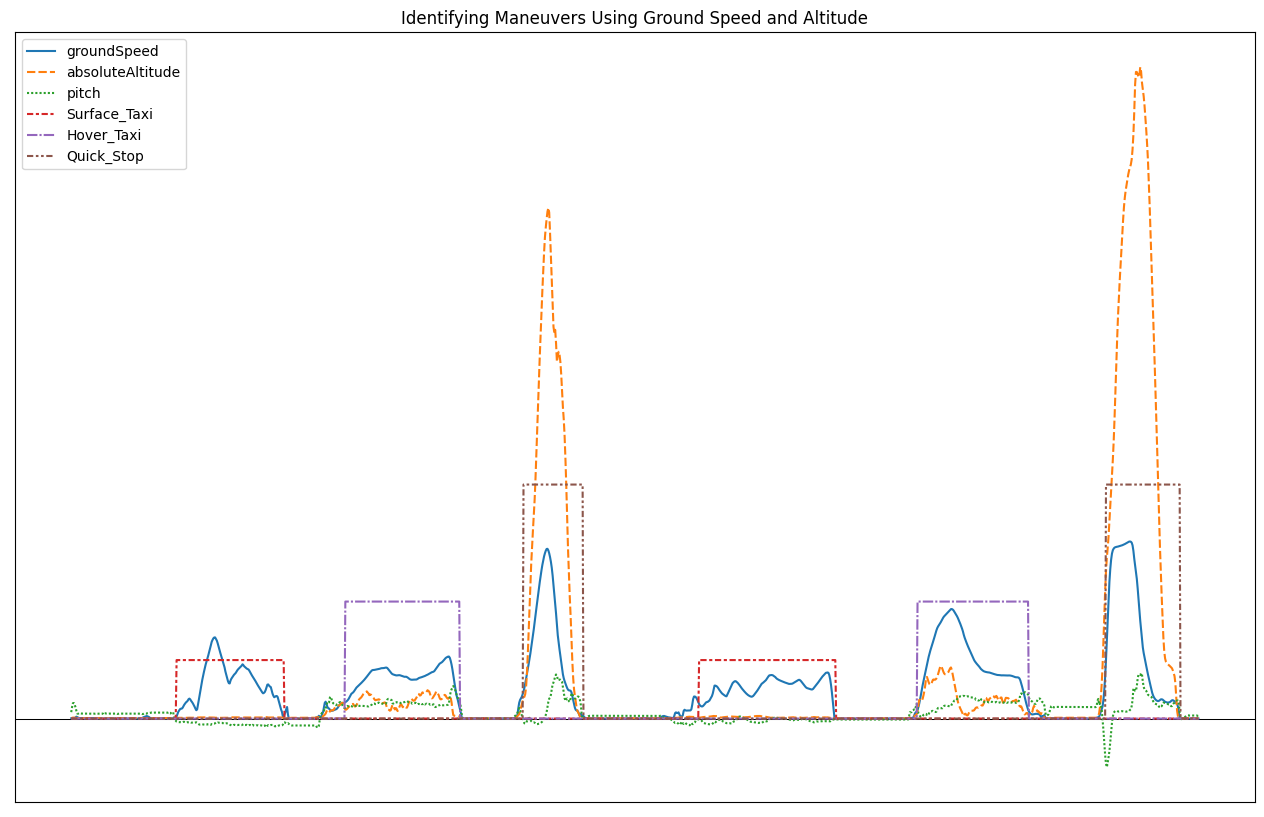

In [17]:
#Plot Ground Speed vs altitude over time - during period with flight logs
df_groundspd_alt = df.loc[(df['datetime'].between('2022-09-19 21:50:45' , '2022-09-19 22:25:25', inclusive='both')),['datetime', 'groundSpeed', 'absoluteAltitude', 'pitch', 'Surface_Taxi', 'Hover_Taxi', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df_groundspd_alt).set(title = 'Identifying Maneuvers Using Ground Speed and Altitude')

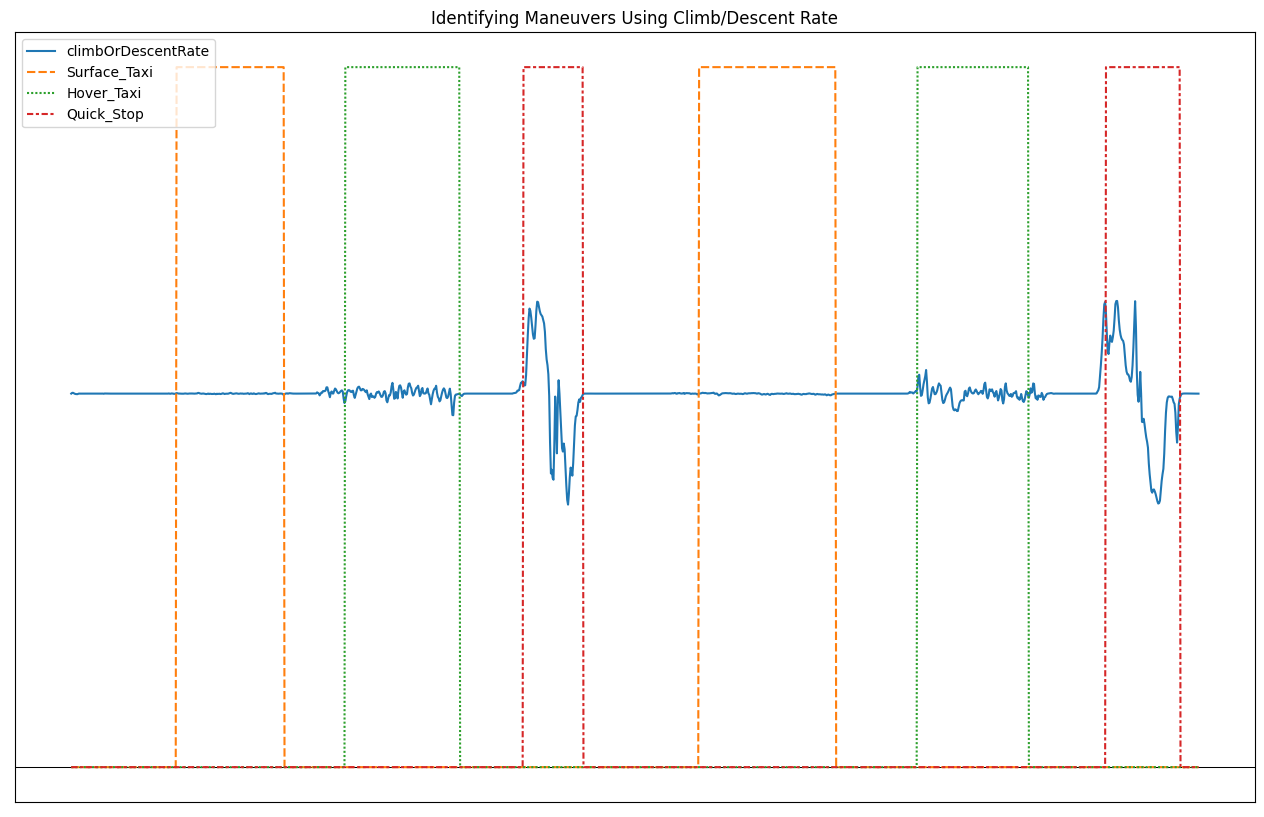

In [18]:
#Plot Ground Speed vs altitude over time
df_climb_desc = df_norm.loc[(df_norm['datetime'].between('2022-09-19 21:50:45' , '2022-09-19 22:25:25' , inclusive='both')),['datetime', 'climbOrDescentRate', 'Surface_Taxi', 'Hover_Taxi', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df_climb_desc).set(title = 'Identifying Maneuvers Using Climb/Descent Rate')

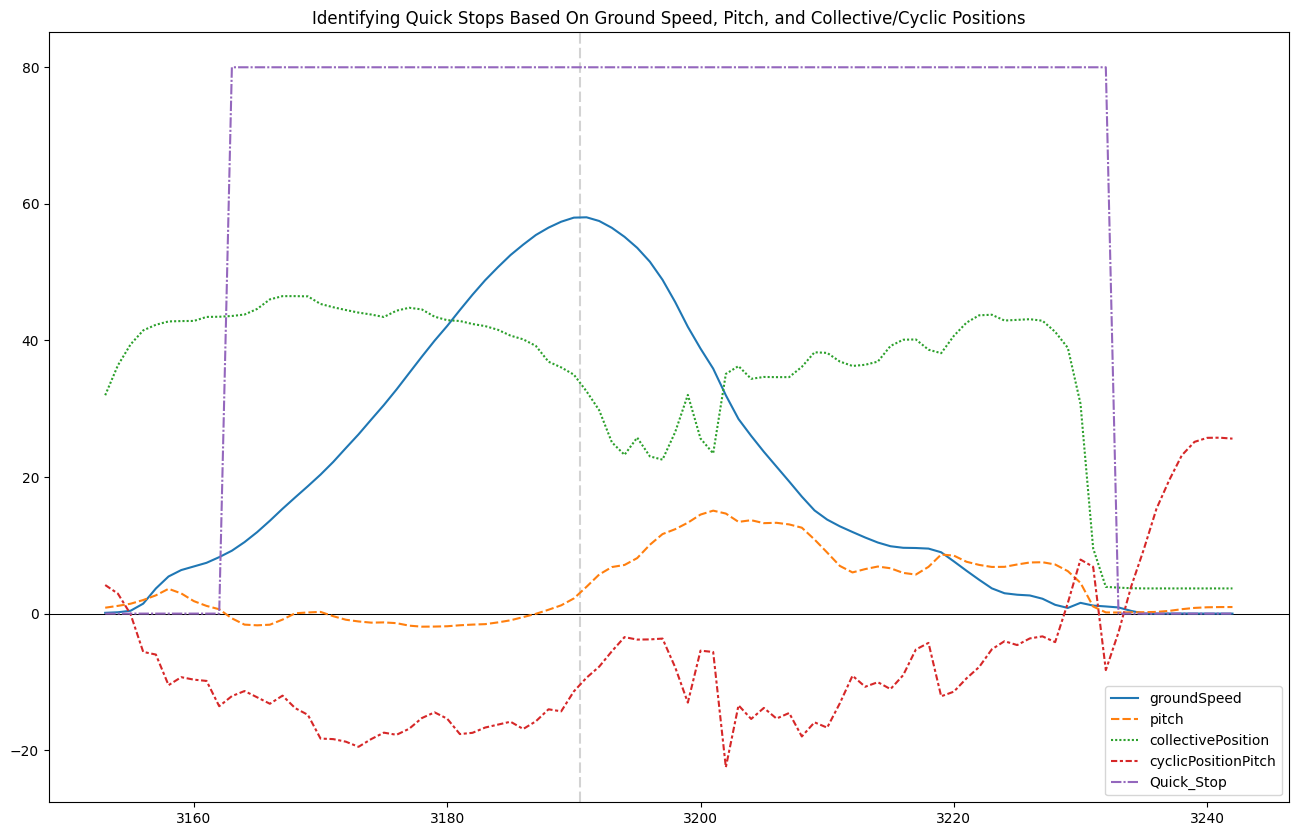

In [19]:
#Plot Quick Stops vs Pitch, Ground Speed, Collective, Cyclic, and Altitude Changes
df_qs = df.loc[(df['datetime'].between('2022-09-19 22:00:25' , '2022-09-19 22:01:54' , inclusive='both')),['datetime', 'groundSpeed', 'pitch', 'collectivePosition', 'cyclicPositionPitch', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axvline(3190.5, c = 'lightgrey', dashes = (5, 2))
plt.axhline(0, c = 'black', lw = 0.75)

p = sns.lineplot(data = df_qs).set(title = 'Identifying Quick Stops Based On Ground Speed, Pitch, and Collective/Cyclic Positions')

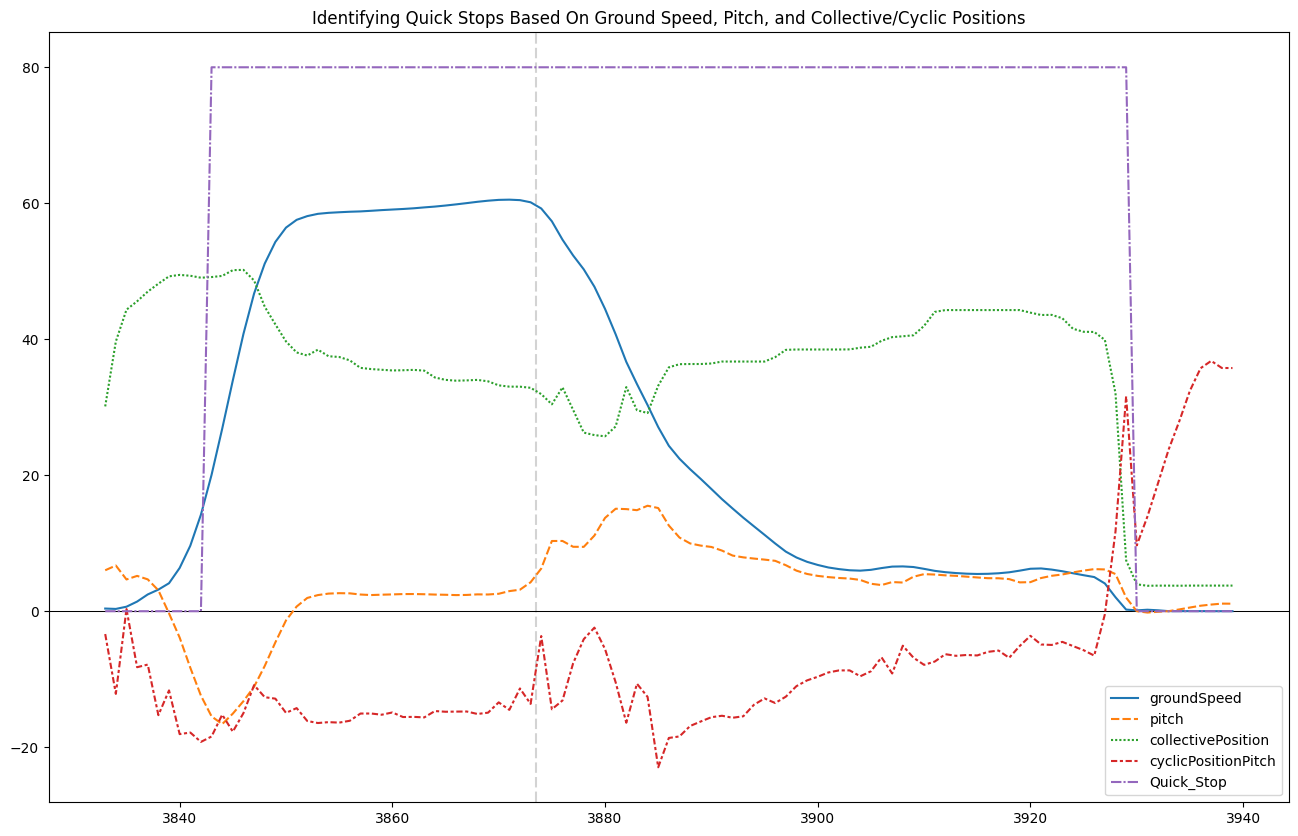

In [20]:
#Plot Quick Stops vs Pitch, Ground Speed, Collective, Cyclic, and Altitude Changes
df_qs = df.loc[(df['datetime'].between('2022-09-19 22:11:45' , '2022-09-19 22:13:31' , inclusive='both')),['datetime', 'groundSpeed', 'pitch', 'collectivePosition', 'cyclicPositionPitch', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axvline(3873.5, c = 'lightgrey', dashes = (5, 2))
plt.axhline(0, c = 'black', lw = 0.75)
p = sns.lineplot(data = df_qs).set(title = 'Identifying Quick Stops Based On Ground Speed, Pitch, and Collective/Cyclic Positions')

### EDA for 9/20 

In [21]:
# reading files from 9/20 dataset
df4 = pd.read_csv('SimData_2022.09.20_16.22.07.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df4 = df_transformation(df4)


df5 = pd.read_csv('SimData_2022.09.20_16.28.31.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df5 = df_transformation(df5)

C:\Users\fariy\AppData\Local\Temp\ipykernel_3476\2982814667.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [22]:
df20 = pd.concat([df4,df5]).reset_index()
len(df20)

1181

In [23]:
#normalize values 
df20_norm = df20.loc[:, df20.columns != 'datetime']
df20_norm = (df20_norm-df20_norm.min())/(df20_norm.max()-df20_norm.min())
df20_norm.insert(1, 'datetime', df20[['datetime']])

In [24]:
#Add columns for surface and hover taxi maneuvers and set default value to zero
df20['Surface_Taxi'] = 0
df20['Hover_Taxi'] = 0


In [25]:
#Add columns for surface and hover taxi maneuvers and set default value to zero
df20_norm['Surface_Taxi'] = 0
df20_norm['Hover_Taxi'] = 0

In [26]:

#label data points
df20.loc[(df20['datetime'].between('2022-09-20 20:25:40' , '2022-09-20 20:27:54' , inclusive='both')),['Surface_Taxi']] = 20
df20.loc[(df20['datetime'].between('2022-09-20 20:28:44' , '2022-09-20 20:30:06' , inclusive='both')),['Hover_Taxi']] = 40
df20.loc[(df20['datetime'].between('2022-09-20 20:30:31' , '2022-09-20 20:32:16' , inclusive='both')),['Hover_Taxi']] = 40
df20.loc[(df20['datetime'].between('2022-09-20 20:34:50' , '2022-09-20 20:36:51' , inclusive='both')),['Hover_Taxi']] = 40


In [27]:
#label data points
df20_norm.loc[(df20_norm['datetime'].between('2022-09-20 20:25:40' , '2022-09-20 20:27:54' , inclusive='both')),['Surface_Taxi']] = 1
df20_norm.loc[(df20_norm['datetime'].between('2022-09-20 20:28:44' , '2022-09-20 20:30:06' , inclusive='both')),['Hover_Taxi']] = 1
df20_norm.loc[(df20_norm['datetime'].between('2022-09-20 20:30:31' , '2022-09-20 20:32:16' , inclusive='both')),['Hover_Taxi']] = 1
df20_norm.loc[(df20_norm['datetime'].between('2022-09-20 20:34:50' , '2022-09-20 20:36:51' , inclusive='both')),['Hover_Taxi']] = 1


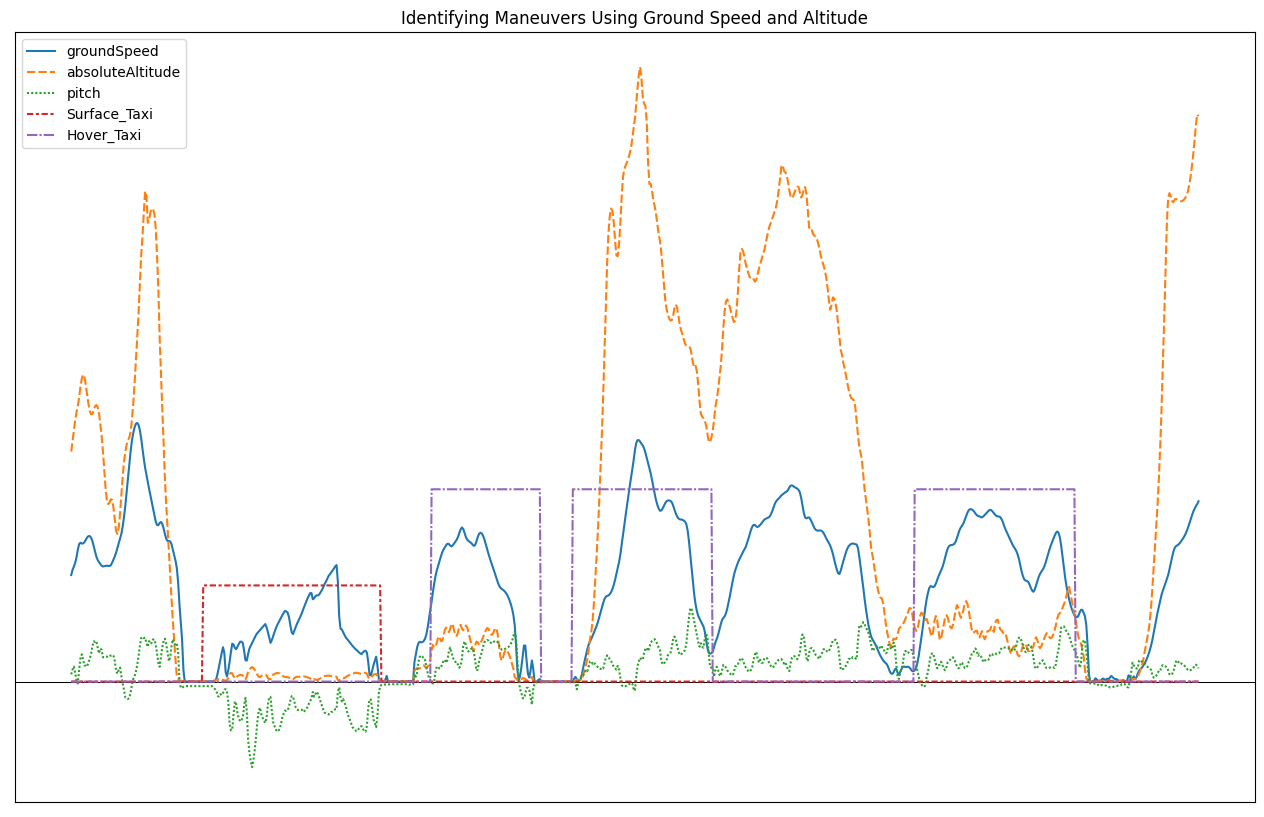

In [28]:
#Plot Ground Speed vs altitude over time - during period with flight logs
df20_groundspd_alt = df20.loc[(df20['datetime'].between('2022-09-20 20:24:00' , '2022-09-20 20:38:25', inclusive='both')),['datetime', 'groundSpeed', 'absoluteAltitude', 'pitch', 'Surface_Taxi', 'Hover_Taxi']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df20_groundspd_alt).set(title = 'Identifying Maneuvers Using Ground Speed and Altitude')

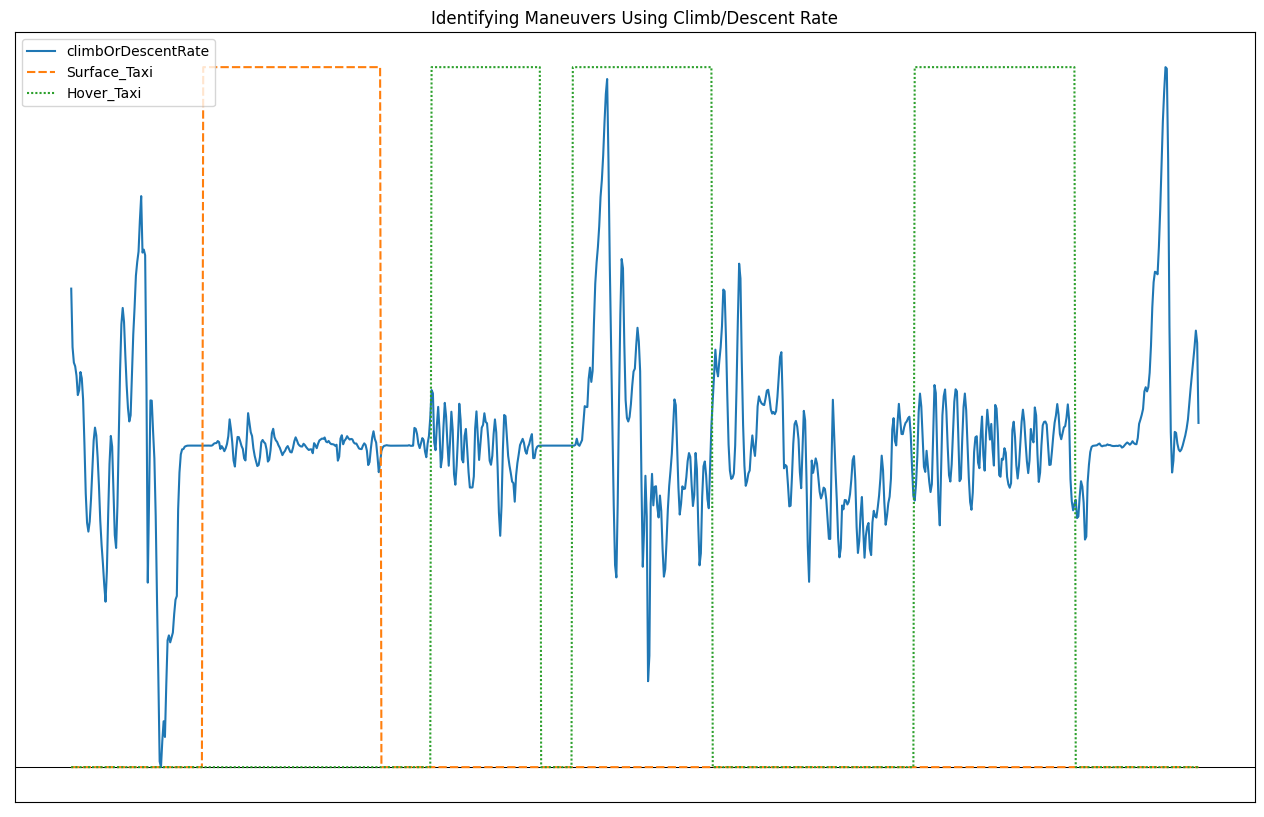

In [29]:
#Plot Ground Speed vs altitude over time
df20_climb_desc = df20_norm.loc[(df20_norm['datetime'].between('2022-09-20 20:24:00' , '2022-09-20 20:38:25' , inclusive='both')),['datetime', 'climbOrDescentRate', 'Surface_Taxi', 'Hover_Taxi']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df20_climb_desc).set(title = 'Identifying Maneuvers Using Climb/Descent Rate')

### EDA for 9/22

In [30]:
# reading files from 9/22 dataset
df6 = pd.read_csv('SimData_2022.09.22_17.11.56.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df22 = df_transformation(df6)



C:\Users\fariy\AppData\Local\Temp\ipykernel_3476\2982814667.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [31]:
#normalize values 
df22_norm = df22.loc[:, df22.columns != 'datetime']
df22_norm = (df22_norm-df22_norm.min())/(df22_norm.max()-df22_norm.min())
df22_norm.insert(1, 'datetime', df22[['datetime']])

In [32]:
#Add columns for surface and hover taxi maneuvers and set default value to zero
df22['Surface_Taxi'] = 0
df22['Hover_Taxi'] = 0
df22['Quick_Stop'] = 0

In [33]:
#Add columns for surface and hover taxi maneuvers and set default value to zero
df22_norm['Surface_Taxi'] = 0
df22_norm['Hover_Taxi'] = 0
df22_norm['Quick_Stop'] = 0

In [34]:
#label data points
df22.loc[(df22['datetime'].between('2022-09-22 21:16:37' , '2022-09-22 21:19:56' , inclusive='both')),['Surface_Taxi']] = 20
df22.loc[(df22['datetime'].between('2022-09-22 21:20:41' , '2022-09-22 21:23:56' , inclusive='both')),['Hover_Taxi']] = 40
df22.loc[(df22['datetime'].between('2022-09-22 21:28:35' , '2022-09-22 21:29:46' , inclusive='both')),['Hover_Taxi']] = 40
#df.loc[(df['datetime'].between('2022-09-22 21:34:50' , '2022-09-22 21:35:46' , inclusive='both')),['Quick_Stop']] = 80
df22.loc[(df22['datetime'].between('2022-09-22 21:36:30' , '2022-09-22 21:37:10' , inclusive='both')),['Quick_Stop']] = 80
df22.loc[(df22['datetime'].between('2022-09-22 21:39:16' , '2022-09-22 21:39:42' , inclusive='both')),['Quick_Stop']] = 80
df22.loc[(df22['datetime'].between('2022-09-22 21:40:06' , '2022-09-22 21:40:36' , inclusive='both')),['Quick_Stop']] = 80
df22.loc[(df22['datetime'].between('2022-09-22 21:43:16' , '2022-09-22 21:43:41' , inclusive='both')),['Surface_Taxi']] = 20
df22.loc[(df22['datetime'].between('2022-09-22 21:44:09' , '2022-09-22 21:45:31' , inclusive='both')),['Hover_Taxi']] = 40


In [35]:
#label data points
df22_norm.loc[(df22_norm['datetime'].between('2022-09-22 21:16:37' , '2022-09-22 21:19:56' , inclusive='both')),['Surface_Taxi']] = 1
df22_norm.loc[(df22_norm['datetime'].between('2022-09-22 21:20:41' , '2022-09-22 21:23:56' , inclusive='both')),['Hover_Taxi']] = 1
df22_norm.loc[(df22_norm['datetime'].between('2022-09-22 21:28:35' , '2022-09-22 21:29:46' , inclusive='both')),['Hover_Taxi']] = 1
#df_norm.loc[(df_norm['datetime'].between('2022-09-22 21:34:50' , '2022-09-22 21:35:46' , inclusive='both')),['Quick_Stop']] = 1
df22_norm.loc[(df22_norm['datetime'].between('2022-09-22 21:36:30' , '2022-09-22 21:37:10' , inclusive='both')),['Quick_Stop']] = 1
df22_norm.loc[(df22_norm['datetime'].between('2022-09-22 21:39:16' , '2022-09-22 21:39:42' , inclusive='both')),['Quick_Stop']] = 1
df22_norm.loc[(df22_norm['datetime'].between('2022-09-22 21:40:06' , '2022-09-22 21:40:36' , inclusive='both')),['Quick_Stop']] = 1
df22_norm.loc[(df22_norm['datetime'].between('2022-09-22 21:43:16' , '2022-09-22 21:43:41' , inclusive='both')),['Surface_Taxi']] = 1
df22_norm.loc[(df22_norm['datetime'].between('2022-09-22 21:44:09' , '2022-09-22 21:45:31' , inclusive='both')),['Hover_Taxi']] = 1

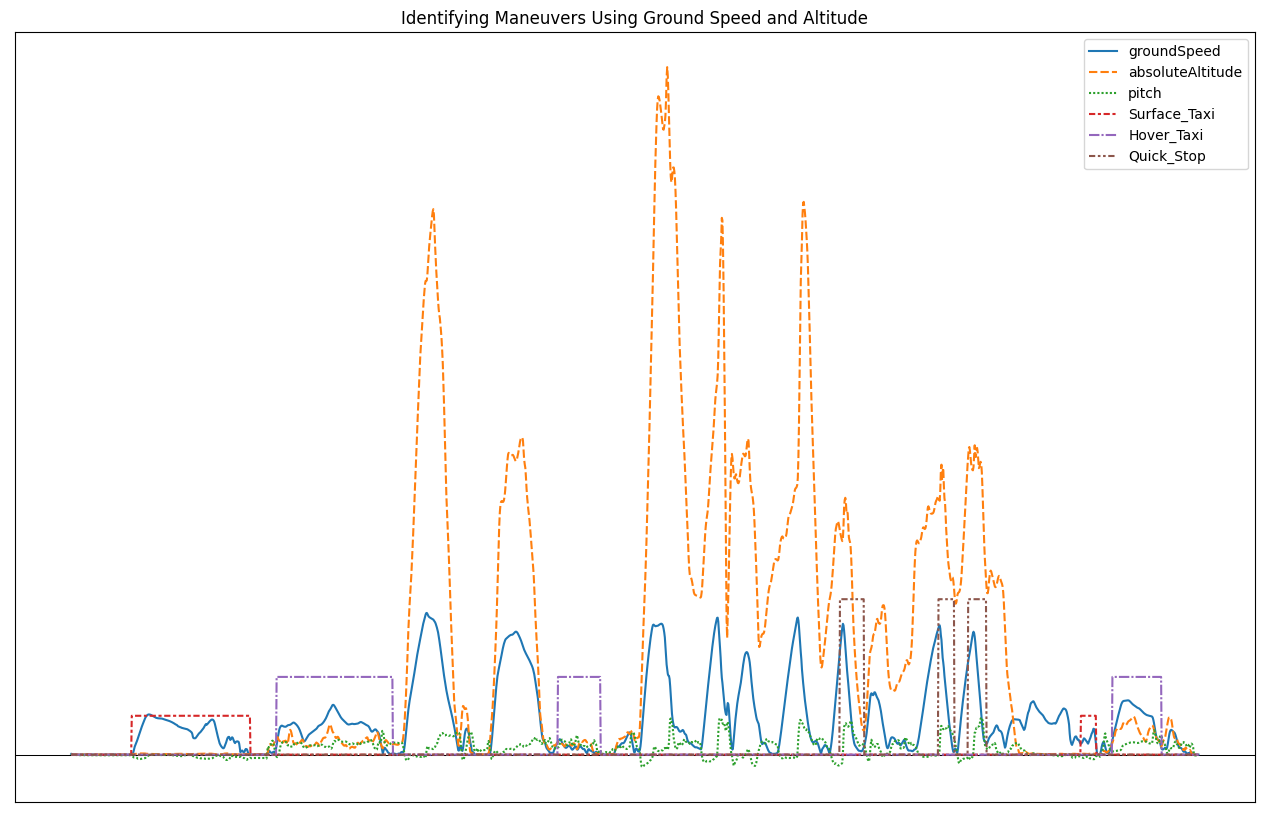

In [36]:
#Plot Ground Speed vs altitude over time - during period with flight logs
df22_groundspd_alt = df22.loc[(df22['datetime'].between('2022-09-22 21:10:45' , '2022-09-22 21:50:25', inclusive='both')),['datetime', 'groundSpeed', 'absoluteAltitude', 'pitch', 'Surface_Taxi', 'Hover_Taxi', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df22_groundspd_alt).set(title = 'Identifying Maneuvers Using Ground Speed and Altitude')

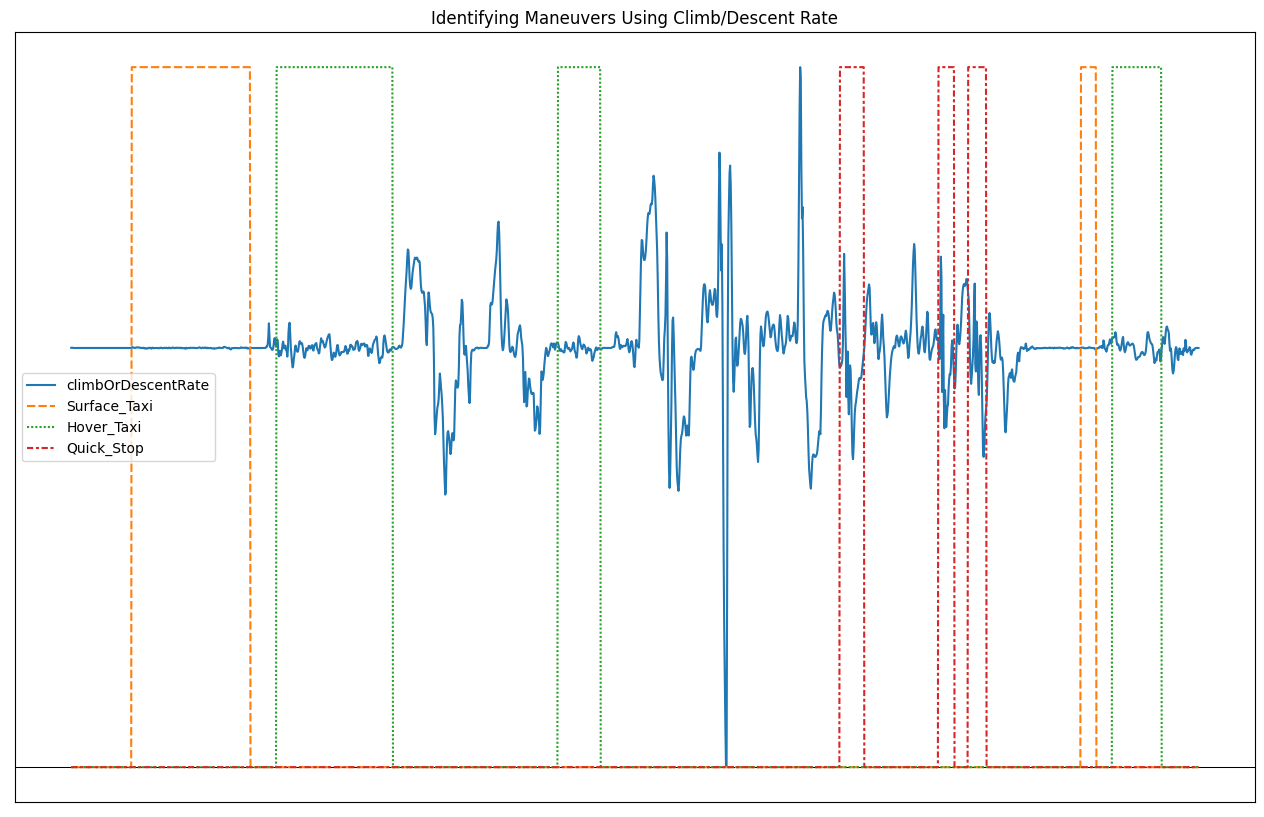

In [37]:
#Plot Ground Speed vs altitude over time
df22_climb_desc = df22_norm.loc[(df22_norm['datetime'].between('2022-09-22 21:10:45' , '2022-09-22 21:50:25' , inclusive='both')),['datetime', 'climbOrDescentRate', 'Surface_Taxi', 'Hover_Taxi', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df22_climb_desc).set(title = 'Identifying Maneuvers Using Climb/Descent Rate')

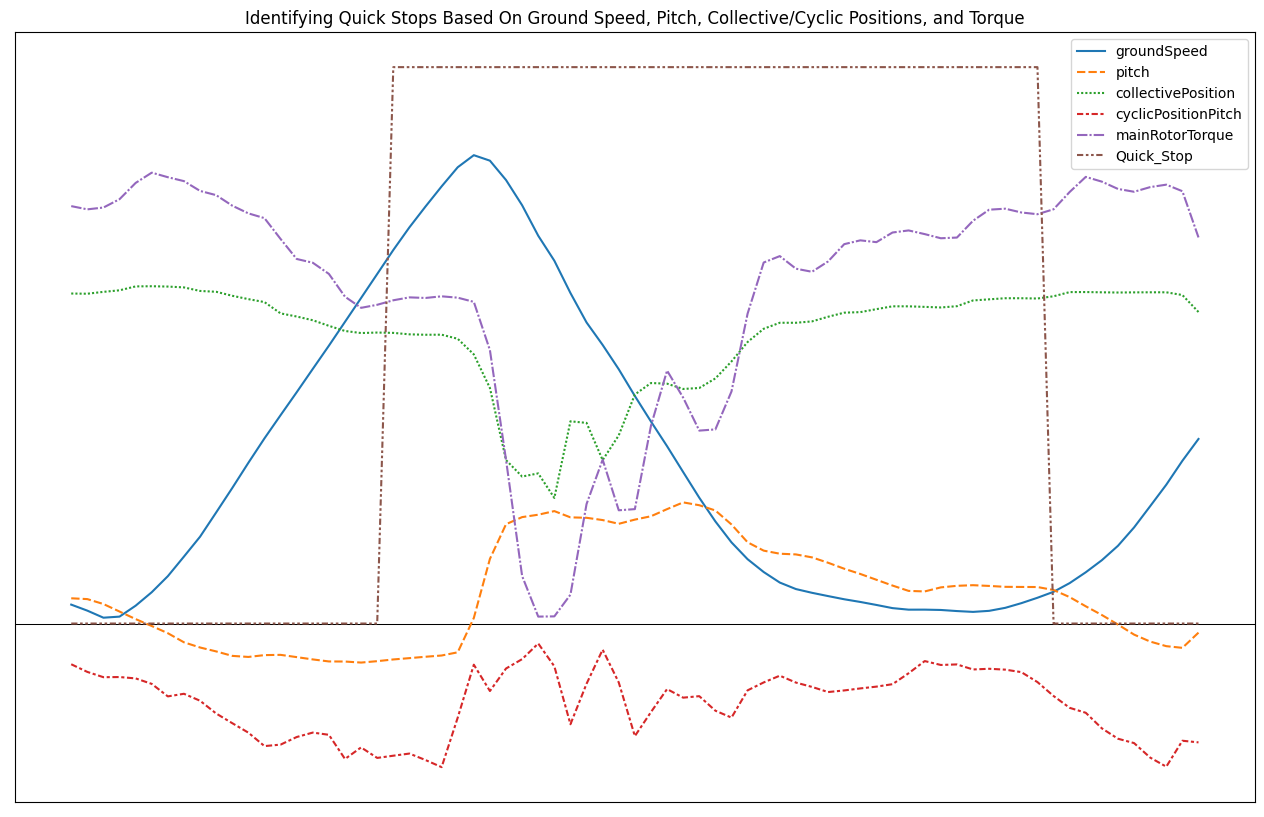

In [38]:
#Plot Quick Stops vs Pitch, Ground Speed, Collective, Cyclic, Torque and Altitude Changes
df22_qs = df22.loc[(df22['datetime'].between('2022-09-22 21:36:10' , '2022-09-22 21:37:20' , inclusive='both')),['datetime', 'groundSpeed', 'pitch', 'collectivePosition', 'cyclicPositionPitch', 'mainRotorTorque', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df22_qs).set(title = 'Identifying Quick Stops Based On Ground Speed, Pitch, Collective/Cyclic Positions, and Torque')

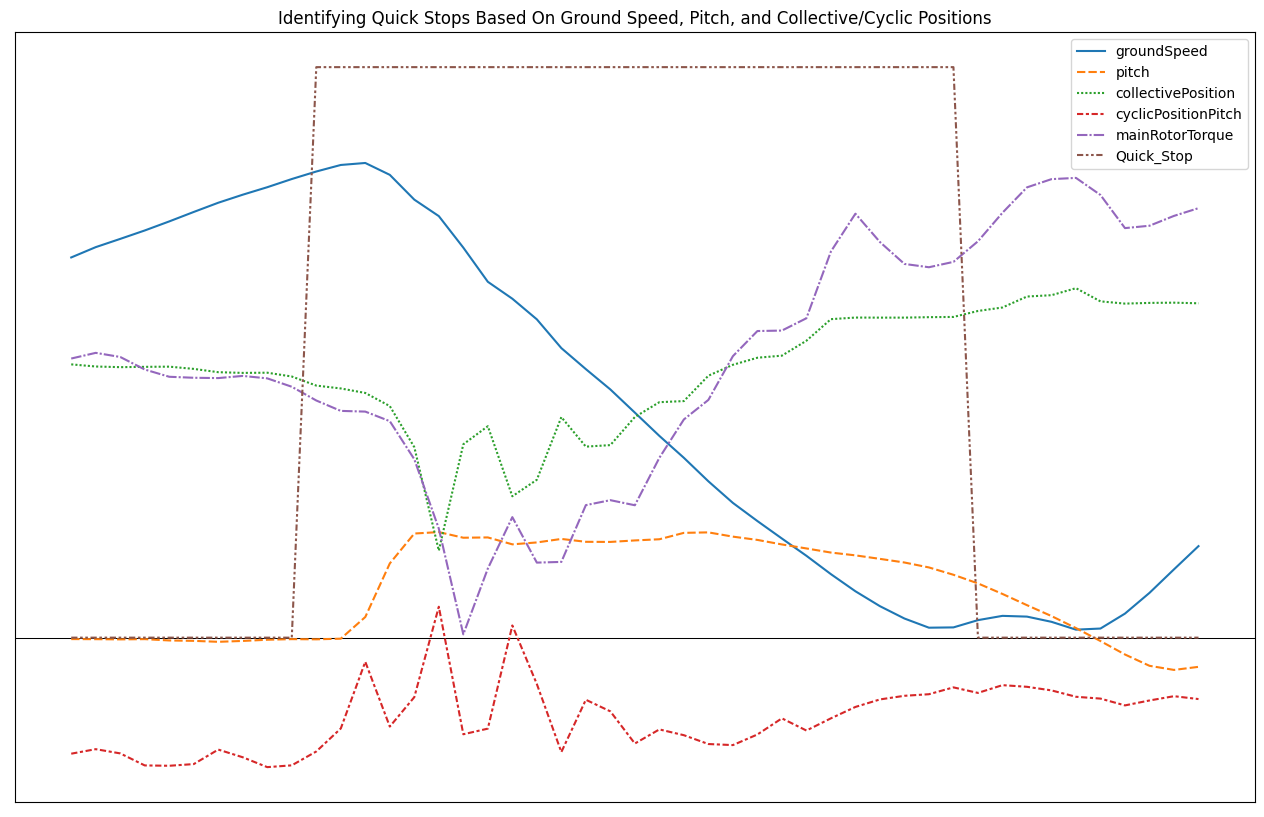

In [39]:
#Plot Quick Stops vs Pitch, Ground Speed, Collective, Cyclic, Torque and Altitude Changes
df22_qs = df22.loc[(df22['datetime'].between('2022-09-22 21:39:06' , '2022-09-22 21:39:52' , inclusive='both')),['datetime', 'groundSpeed', 'pitch', 'collectivePosition', 'cyclicPositionPitch', 'mainRotorTorque', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df22_qs).set(title = 'Identifying Quick Stops Based On Ground Speed, Pitch, and Collective/Cyclic Positions')

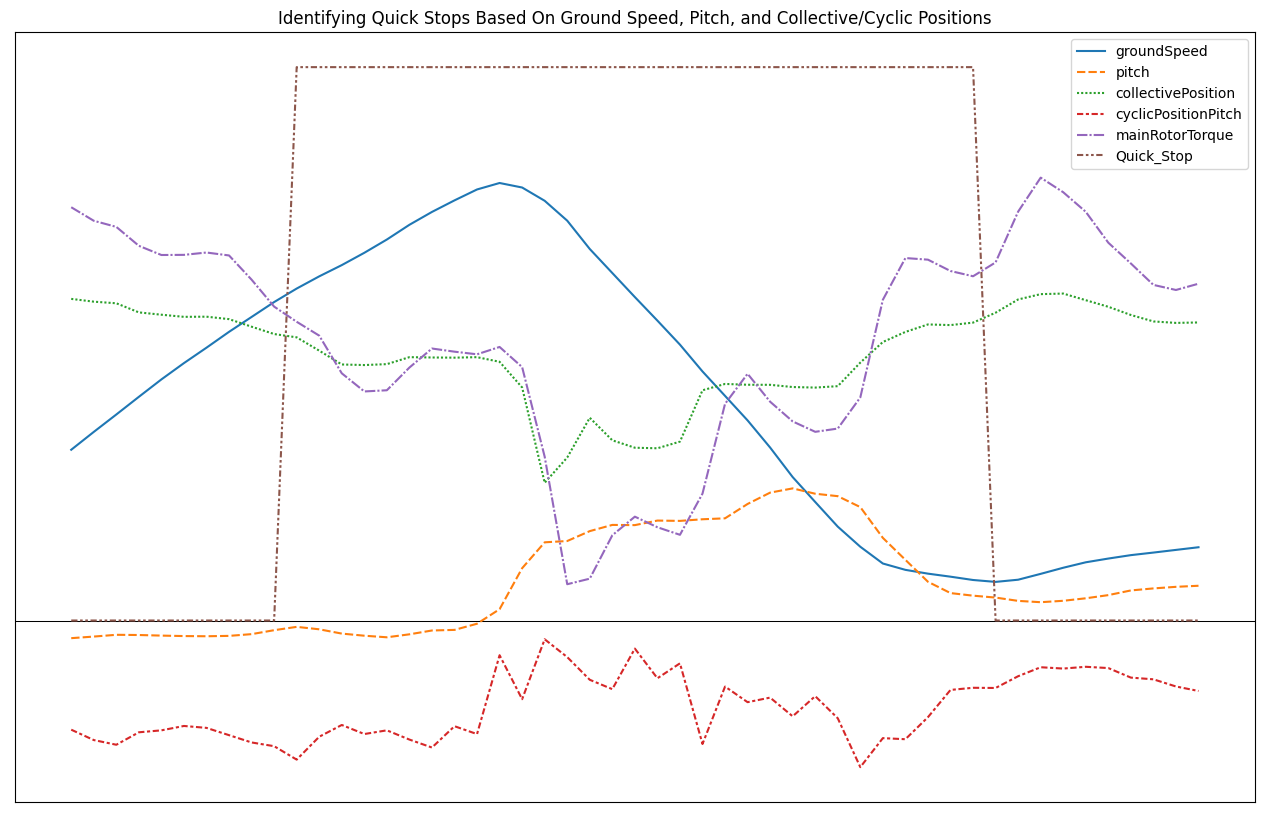

In [40]:
#Plot Quick Stops vs Pitch, Ground Speed, Collective, Cyclic, Torque and Altitude Changes
df22_qs = df22.loc[(df22['datetime'].between('2022-09-22 21:39:56' , '2022-09-22 21:40:46' , inclusive='both')),['datetime', 'groundSpeed', 'pitch', 'collectivePosition', 'cyclicPositionPitch', 'mainRotorTorque', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df22_qs).set(title = 'Identifying Quick Stops Based On Ground Speed, Pitch, and Collective/Cyclic Positions')

### EDA for 10/06

In [41]:
# reading files from 10/06 dataset
df7 = pd.read_csv('SimData_2022.10.06_09.47.22.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df06 = df_transformation(df7)

C:\Users\fariy\AppData\Local\Temp\ipykernel_3476\2982814667.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [42]:
#normalize values 
df06_norm = df06.loc[:, df06.columns != 'datetime']
df06_norm = (df06_norm-df06_norm.min())/(df06_norm.max()-df06_norm.min())
df06_norm.insert(1, 'datetime', df06[['datetime']])

In [43]:
#Add columns for surface and hover taxi maneuvers and set default value to zero
df06['Surface_Taxi'] = 0
df06['Hover_Taxi'] = 0
df06['Quick_Stop'] = 0

In [44]:
#Add columns for surface and hover taxi maneuvers and set default value to zero
df06_norm['Surface_Taxi'] = 0
df06_norm['Hover_Taxi'] = 0
df06_norm['Quick_Stop'] = 0

In [45]:
#label data points
df06.loc[(df06['datetime'].between('2022-10-06 13:51:10' , '2022-10-06 13:51:42' , inclusive='both')),['Quick_Stop']] = 80
df06.loc[(df06['datetime'].between('2022-10-06 13:52:16' , '2022-10-06 13:56:00' , inclusive='both')),['Surface_Taxi']] = 20
df06.loc[(df06['datetime'].between('2022-10-06 13:56:43' , '2022-10-06 14:00:40' , inclusive='both')),['Hover_Taxi']] = 40
df06.loc[(df06['datetime'].between('2022-10-06 14:04:58' , '2022-10-06 14:05:25' , inclusive='both')),['Quick_Stop']] = 80
df06.loc[(df06['datetime'].between('2022-10-06 14:06:00' , '2022-10-06 14:06:20' , inclusive='both')),['Quick_Stop']] = 80
df06.loc[(df06['datetime'].between('2022-10-06 14:08:02' , '2022-10-06 14:08:26' , inclusive='both')),['Quick_Stop']] = 80
#df06.loc[(df06['datetime'].between('2022-10-06 14:09:40' , '2022-10-06 14:09:57' , inclusive='both')),['Quick_Stop']] = 80



In [46]:
#label data points
df06_norm.loc[(df06_norm['datetime'].between('2022-10-06 13:51:10' , '2022-10-06 13:51:42' , inclusive='both')),['Quick_Stop']] = 1
df06_norm.loc[(df06_norm['datetime'].between('2022-10-06 13:52:16' , '2022-10-06 13:56:00' , inclusive='both')),['Surface_Taxi']] = 1
df06_norm.loc[(df06_norm['datetime'].between('2022-10-06 13:56:43' , '2022-10-06 14:00:40' , inclusive='both')),['Hover_Taxi']] = 1
df06_norm.loc[(df06_norm['datetime'].between('2022-10-06 14:04:58' , '2022-10-06 14:05:25' , inclusive='both')),['Quick_Stop']] = 1
df06_norm.loc[(df06_norm['datetime'].between('2022-10-06 14:06:00' , '2022-10-06 14:06:20' , inclusive='both')),['Quick_Stop']] = 1
df06_norm.loc[(df06_norm['datetime'].between('2022-10-06 14:08:02' , '2022-10-06 14:08:26' , inclusive='both')),['Quick_Stop']] = 1
#df06_norm.loc[(df06_norm['datetime'].between('2022-10-06 14:09:40' , '2022-10-06 14:09:57' , inclusive='both')),['Quick_Stop']] = 1


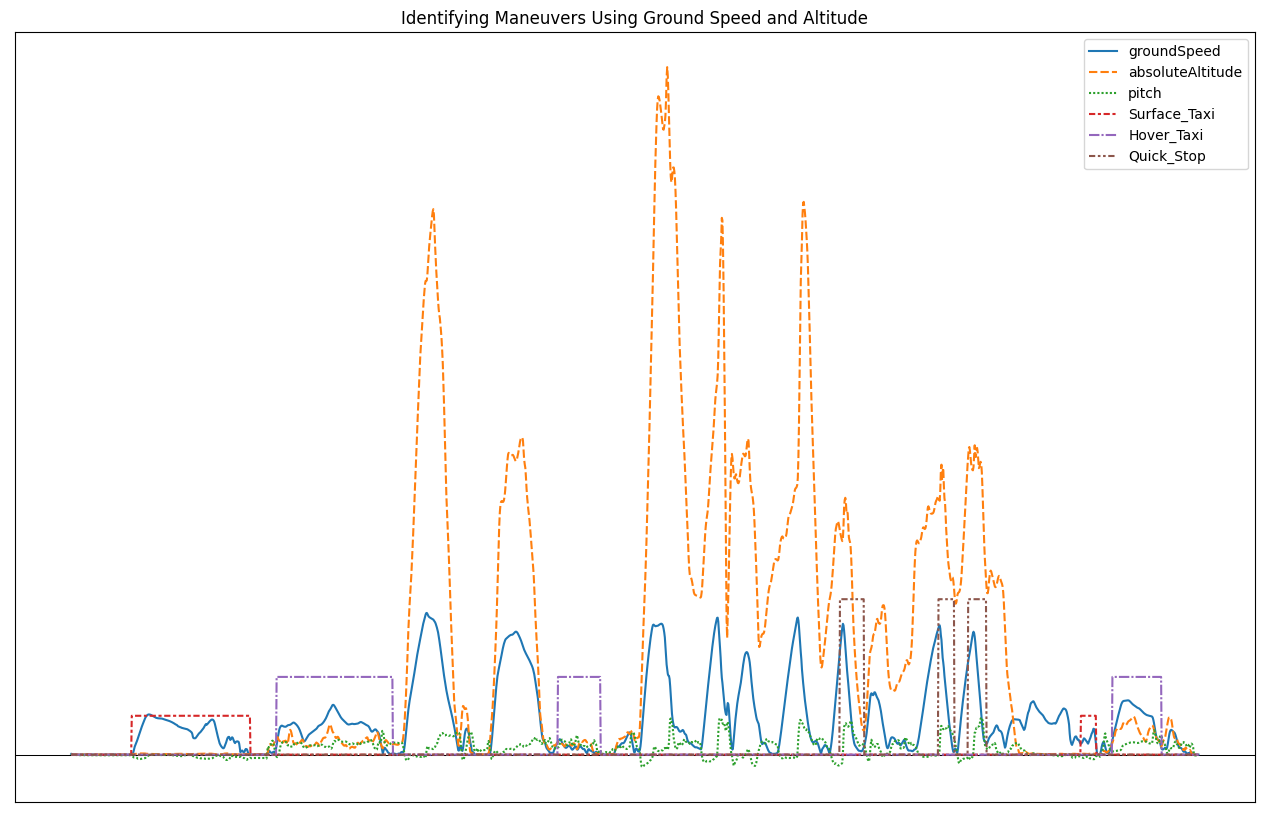

In [47]:
#Plot Ground Speed vs altitude over time - during period with flight logs
df06_groundspd_alt = df06.loc[(df06['datetime'].between('2022-10-06 13:51:00' , '2022-10-06 14:10:00', inclusive='both')),['datetime', 'groundSpeed', 'absoluteAltitude', 'pitch', 'Surface_Taxi', 'Hover_Taxi', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df22_groundspd_alt).set(title = 'Identifying Maneuvers Using Ground Speed and Altitude')

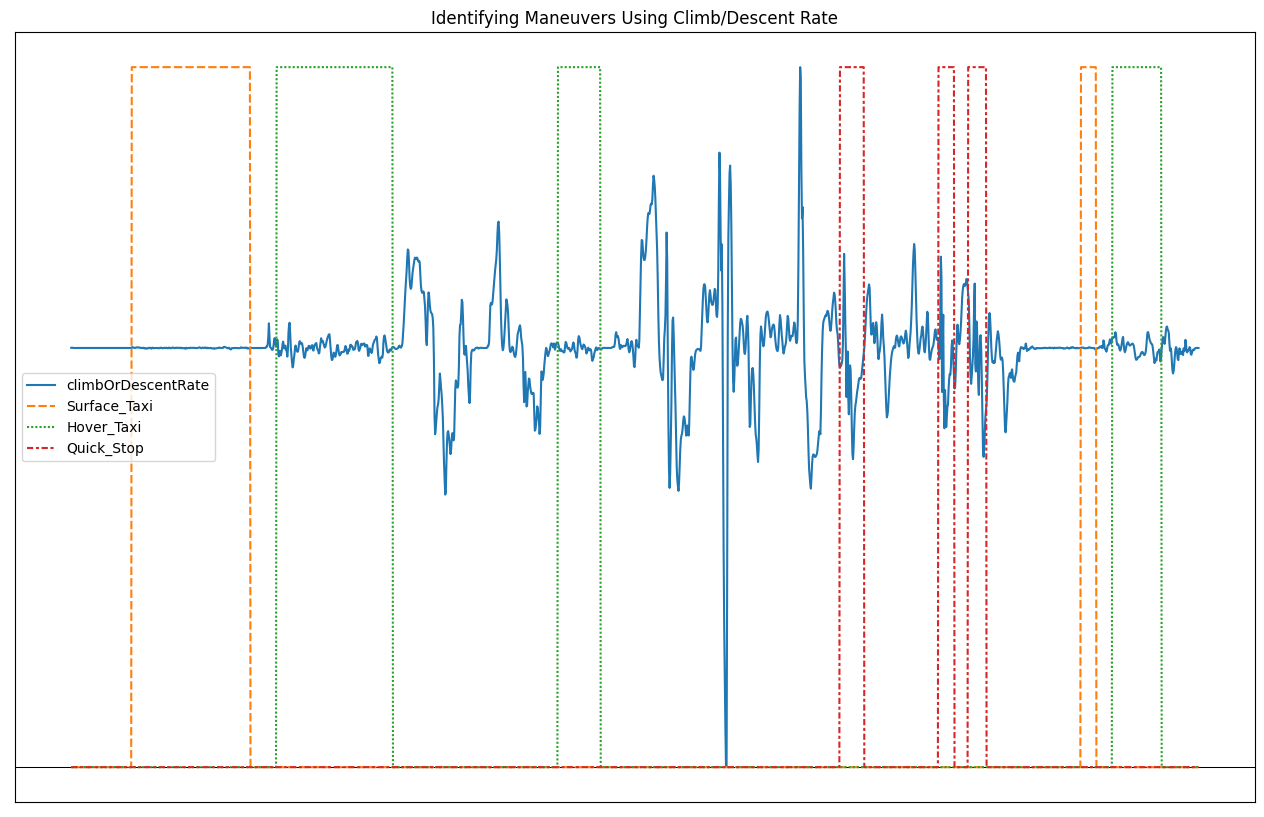

In [48]:
#Plot Ground Speed vs altitude over time
df06_climb_desc = df06_norm.loc[(df06_norm['datetime'].between('2022-10-06 13:51:10' , '2022-10-06 14:10:00' , inclusive='both')),['datetime', 'climbOrDescentRate', 'Surface_Taxi', 'Hover_Taxi', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df22_climb_desc).set(title = 'Identifying Maneuvers Using Climb/Descent Rate')

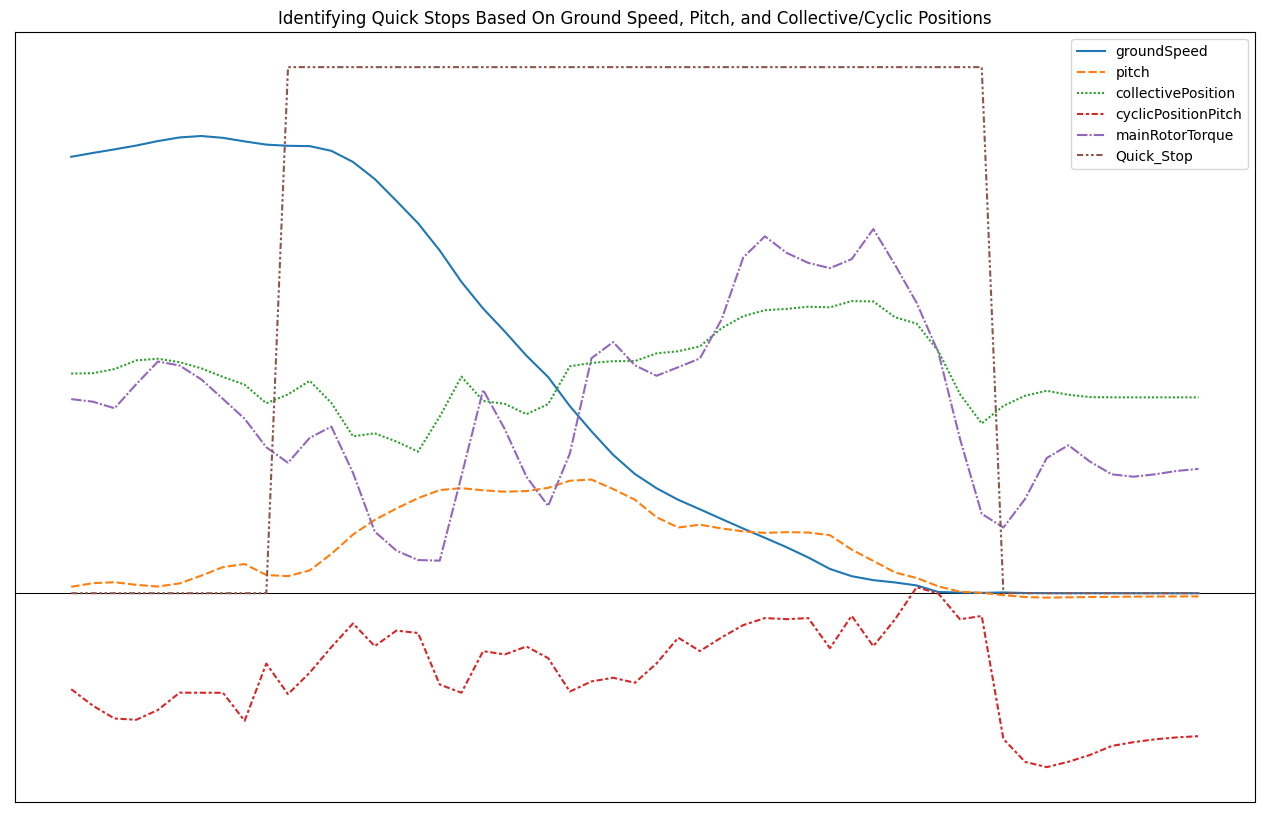

In [49]:
#Plot Quick Stops vs Pitch, Ground Speed, Collective, Cyclic, Torque and Altitude Changes
df06_qs = df06.loc[(df06['datetime'].between('2022-10-06 13:51:00' , '2022-10-06 13:51:52' , inclusive='both')),['datetime', 'groundSpeed', 'pitch', 'collectivePosition', 'cyclicPositionPitch', 'mainRotorTorque', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df06_qs).set(title = 'Identifying Quick Stops Based On Ground Speed, Pitch, and Collective/Cyclic Positions')

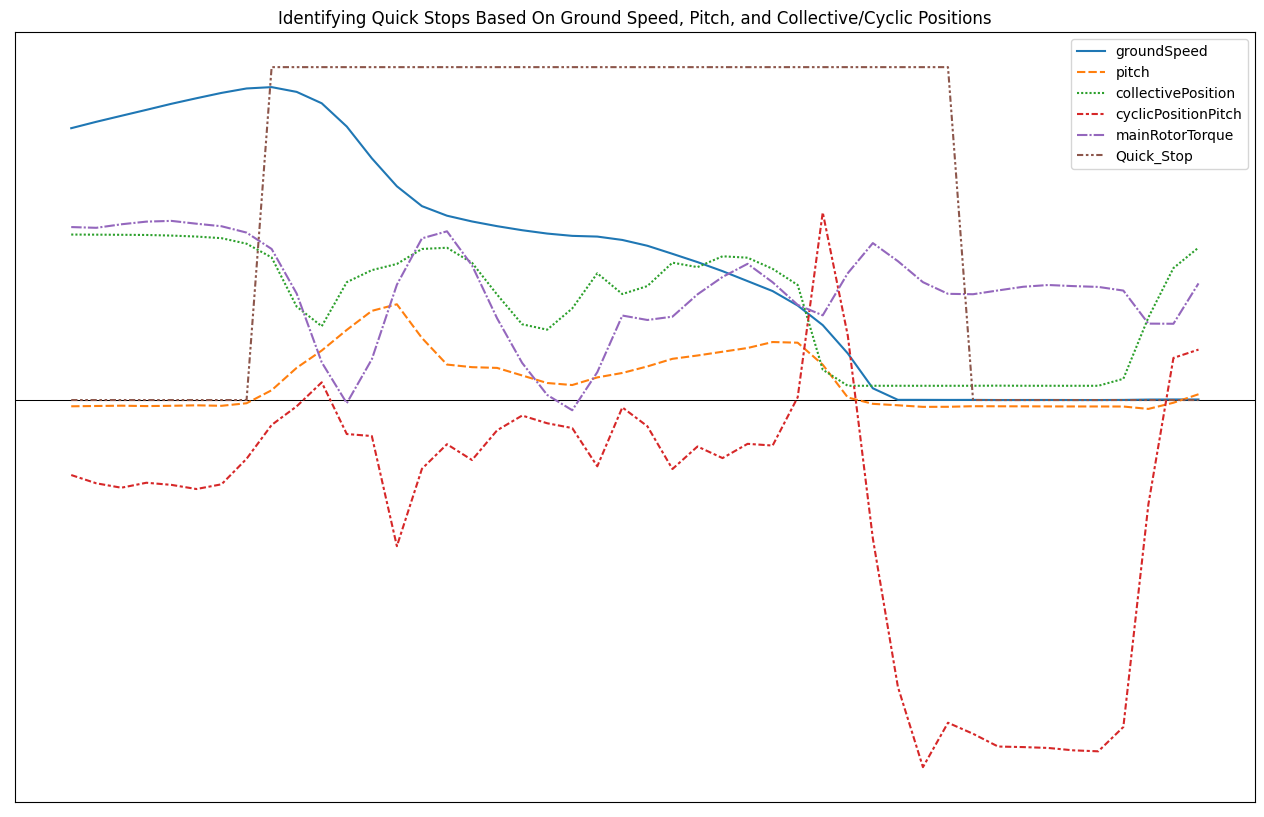

In [50]:
#Plot Quick Stops vs Pitch, Ground Speed, Collective, Cyclic, Torque and Altitude Changes
df06_qs = df06.loc[(df06['datetime'].between('2022-10-06 14:04:50' , '2022-10-06 14:05:35' , inclusive='both')),['datetime', 'groundSpeed', 'pitch', 'collectivePosition', 'cyclicPositionPitch', 'mainRotorTorque', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df06_qs).set(title = 'Identifying Quick Stops Based On Ground Speed, Pitch, and Collective/Cyclic Positions')

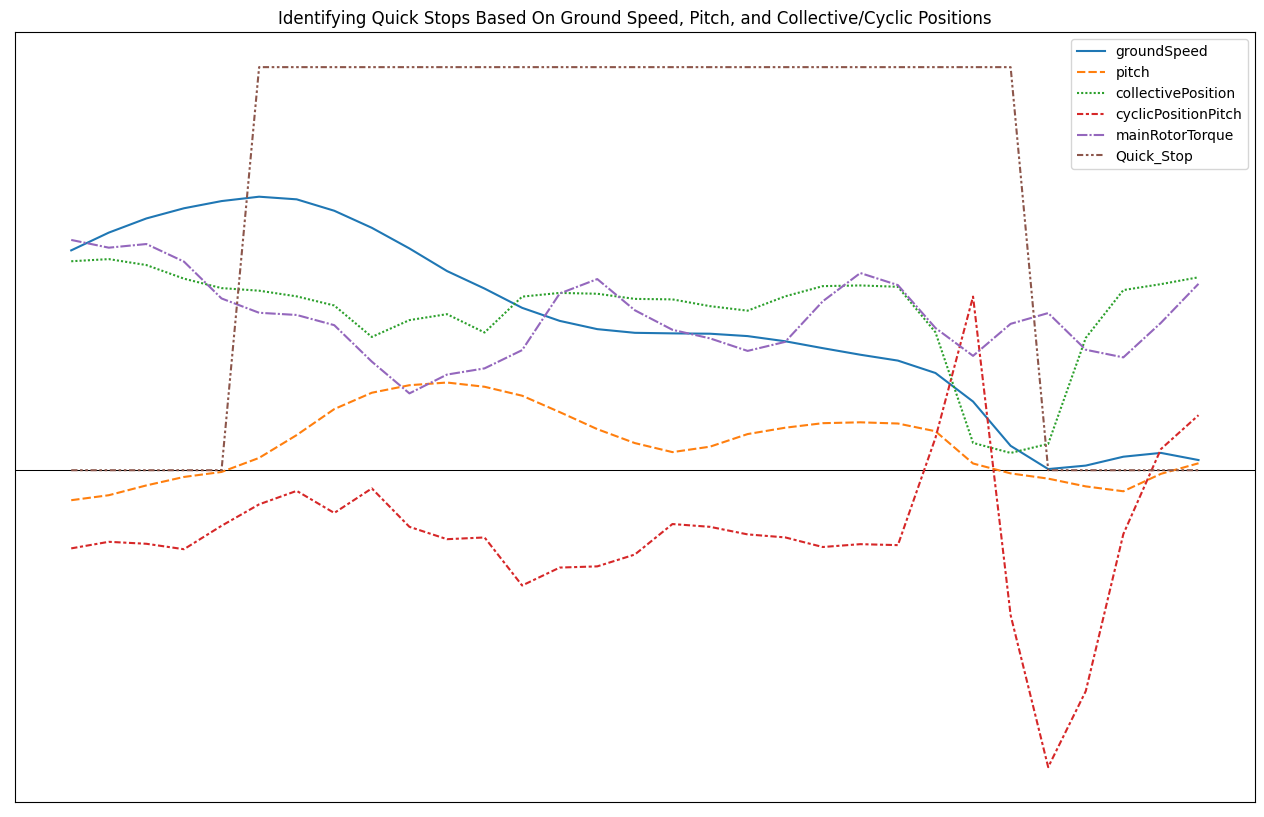

In [51]:
#Plot Quick Stops vs Pitch, Ground Speed, Collective, Cyclic, Torque and Altitude Changes
df06_qs = df06.loc[(df06['datetime'].between('2022-10-06 14:05:55' , '2022-10-06 14:06:25' , inclusive='both')),['datetime', 'groundSpeed', 'pitch', 'collectivePosition', 'cyclicPositionPitch', 'mainRotorTorque', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df06_qs).set(title = 'Identifying Quick Stops Based On Ground Speed, Pitch, and Collective/Cyclic Positions')

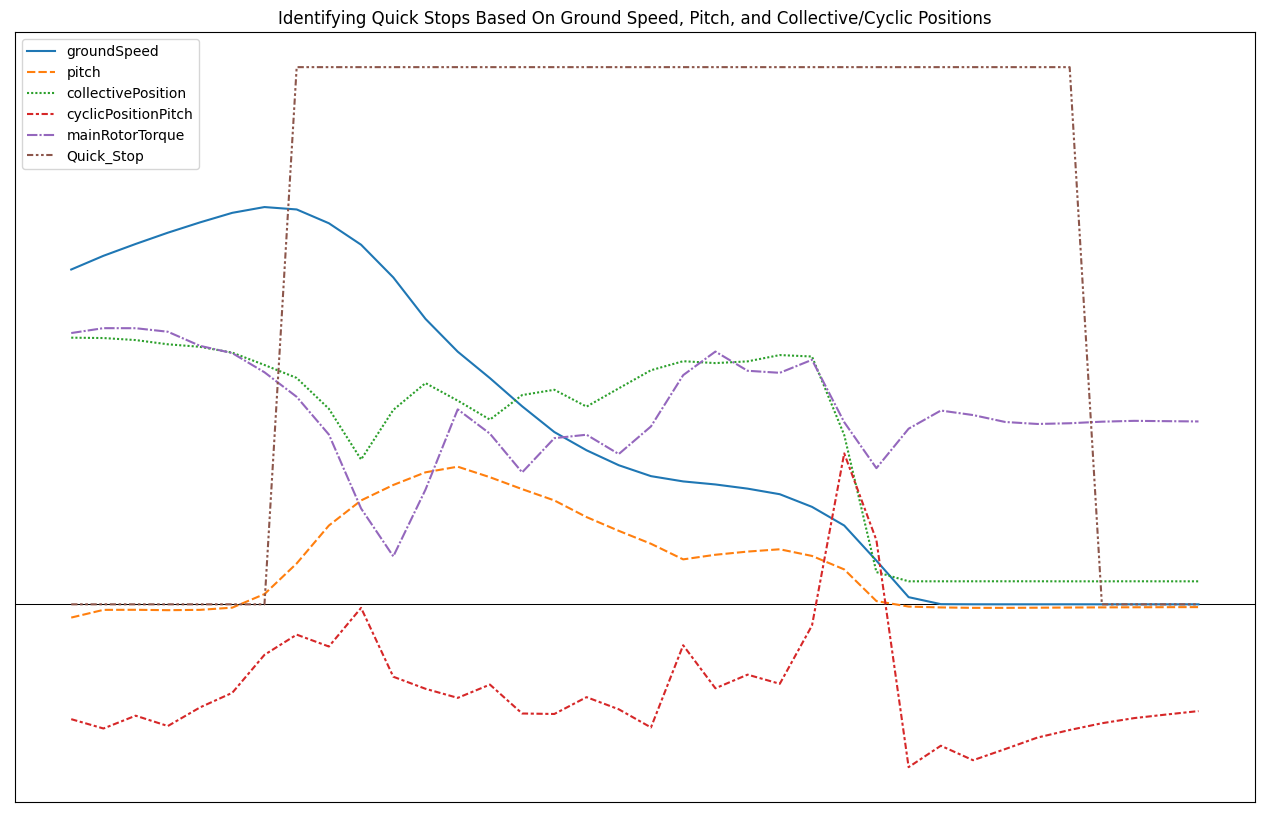

In [52]:
#Plot Quick Stops vs Pitch, Ground Speed, Collective, Cyclic, Torque and Altitude Changes
df06_qs = df06.loc[(df06['datetime'].between('2022-10-06 14:07:55' , '2022-10-06 14:08:30' , inclusive='both')),['datetime', 'groundSpeed', 'pitch', 'collectivePosition', 'cyclicPositionPitch', 'mainRotorTorque', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df06_qs).set(title = 'Identifying Quick Stops Based On Ground Speed, Pitch, and Collective/Cyclic Positions')

### EDA for 10/20

In [53]:
# reading files from 10/20 dataset
df8 = pd.read_csv('SimData_2022.10.20_17.19.15.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df20 = df_transformation(df8)


C:\Users\fariy\AppData\Local\Temp\ipykernel_3476\2982814667.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [54]:
#normalize values 
df20_norm = df20.loc[:, df20.columns != 'datetime']
df20_norm = (df20_norm-df20_norm.min())/(df20_norm.max()-df20_norm.min())
df20_norm.insert(1, 'datetime', df20[['datetime']])

In [55]:
#Add columns for surface and hover taxi maneuvers and set default value to zero
df20['Hover_Taxi'] = 0
df20['Quick_Stop'] = 0

In [56]:
#Add columns for surface and hover taxi maneuvers and set default value to zero
df20_norm['Hover_Taxi'] = 0
df20_norm['Quick_Stop'] = 0

In [57]:
#label data points
df20.loc[(df20['datetime'].between('2022-10-20 21:23:30' , '2022-10-20 21:23:54' , inclusive='both')),['Quick_Stop']] = 80
df20.loc[(df20['datetime'].between('2022-10-20 21:24:55' , '2022-10-20 21:25:20' , inclusive='both')),['Quick_Stop']] = 80
df20.loc[(df20['datetime'].between('2022-10-20 21:26:20' , '2022-10-20 21:26:46' , inclusive='both')),['Quick_Stop']] = 80
df20.loc[(df20['datetime'].between('2022-10-20 21:27:47' , '2022-10-20 21:28:05' , inclusive='both')),['Quick_Stop']] = 80
df20.loc[(df20['datetime'].between('2022-10-20 21:29:33' , '2022-10-20 21:29:56' , inclusive='both')),['Quick_Stop']] = 80
df20.loc[(df20['datetime'].between('2022-10-20 21:30:50' , '2022-10-20 21:31:12' , inclusive='both')),['Quick_Stop']] = 80
df20.loc[(df20['datetime'].between('2022-10-20 21:32:20' , '2022-10-20 21:32:40' , inclusive='both')),['Quick_Stop']] = 80
df20.loc[(df20['datetime'].between('2022-10-20 21:33:55' , '2022-10-20 21:34:18' , inclusive='both')),['Quick_Stop']] = 80
df20.loc[(df20['datetime'].between('2022-10-20 21:35:20' , '2022-10-20 21:35:45' , inclusive='both')),['Quick_Stop']] = 80
df20.loc[(df20['datetime'].between('2022-10-20 21:36:45' , '2022-10-20 21:37:11' , inclusive='both')),['Quick_Stop']] = 80
df20.loc[(df20['datetime'].between('2022-10-20 21:42:00' , '2022-10-20 21:46:30' , inclusive='both')),['Hover_Taxi']] = 40
df20.loc[(df20['datetime'].between('2022-10-20 21:50:00' , '2022-10-20 21:52:05' , inclusive='both')),['Hover_Taxi']] = 40
df20.loc[(df20['datetime'].between('2022-10-20 21:54:00' , '2022-10-20 21:56:45' , inclusive='both')),['Hover_Taxi']] = 40
df20.loc[(df20['datetime'].between('2022-10-20 21:58:00' , '2022-10-20 22:00:08' , inclusive='both')),['Hover_Taxi']] = 40



In [58]:
#label data points
df20_norm.loc[(df20_norm['datetime'].between('2022-10-20 21:23:30' , '2022-10-20 21:23:54' , inclusive='both')),['Quick_Stop']] = 1
df20_norm.loc[(df20_norm['datetime'].between('2022-10-20 21:24:55' , '2022-10-20 21:25:20' , inclusive='both')),['Quick_Stop']] = 1
df20_norm.loc[(df20_norm['datetime'].between('2022-10-20 21:26:20' , '2022-10-20 21:26:46' , inclusive='both')),['Quick_Stop']] = 1
df20_norm.loc[(df20_norm['datetime'].between('2022-10-20 21:27:47' , '2022-10-20 21:28:05' , inclusive='both')),['Quick_Stop']] = 1
df20_norm.loc[(df20_norm['datetime'].between('2022-10-20 21:29:33' , '2022-10-20 21:29:56' , inclusive='both')),['Quick_Stop']] = 1
df20_norm.loc[(df20_norm['datetime'].between('2022-10-20 21:30:50' , '2022-10-20 21:31:12' , inclusive='both')),['Quick_Stop']] = 1
df20_norm.loc[(df20_norm['datetime'].between('2022-10-20 21:32:20' , '2022-10-20 21:32:40' , inclusive='both')),['Quick_Stop']] = 1
df20_norm.loc[(df20_norm['datetime'].between('2022-10-20 21:33:55' , '2022-10-20 21:34:18' , inclusive='both')),['Quick_Stop']] = 1
df20_norm.loc[(df20_norm['datetime'].between('2022-10-20 21:35:20' , '2022-10-20 21:35:45' , inclusive='both')),['Quick_Stop']] = 1
df20_norm.loc[(df20_norm['datetime'].between('2022-10-20 21:36:45' , '2022-10-20 21:37:11' , inclusive='both')),['Quick_Stop']] = 1
df20_norm.loc[(df20_norm['datetime'].between('2022-10-20 21:42:00' , '2022-10-20 21:46:30' , inclusive='both')),['Hover_Taxi']] = 1
df20_norm.loc[(df20_norm['datetime'].between('2022-10-20 21:50:00' , '2022-10-20 21:52:05' , inclusive='both')),['Hover_Taxi']] = 1
df20_norm.loc[(df20_norm['datetime'].between('2022-10-20 21:54:00' , '2022-10-20 21:56:45' , inclusive='both')),['Hover_Taxi']] = 1
df20_norm.loc[(df20_norm['datetime'].between('2022-10-20 21:58:00' , '2022-10-20 22:00:08' , inclusive='both')),['Hover_Taxi']] = 1



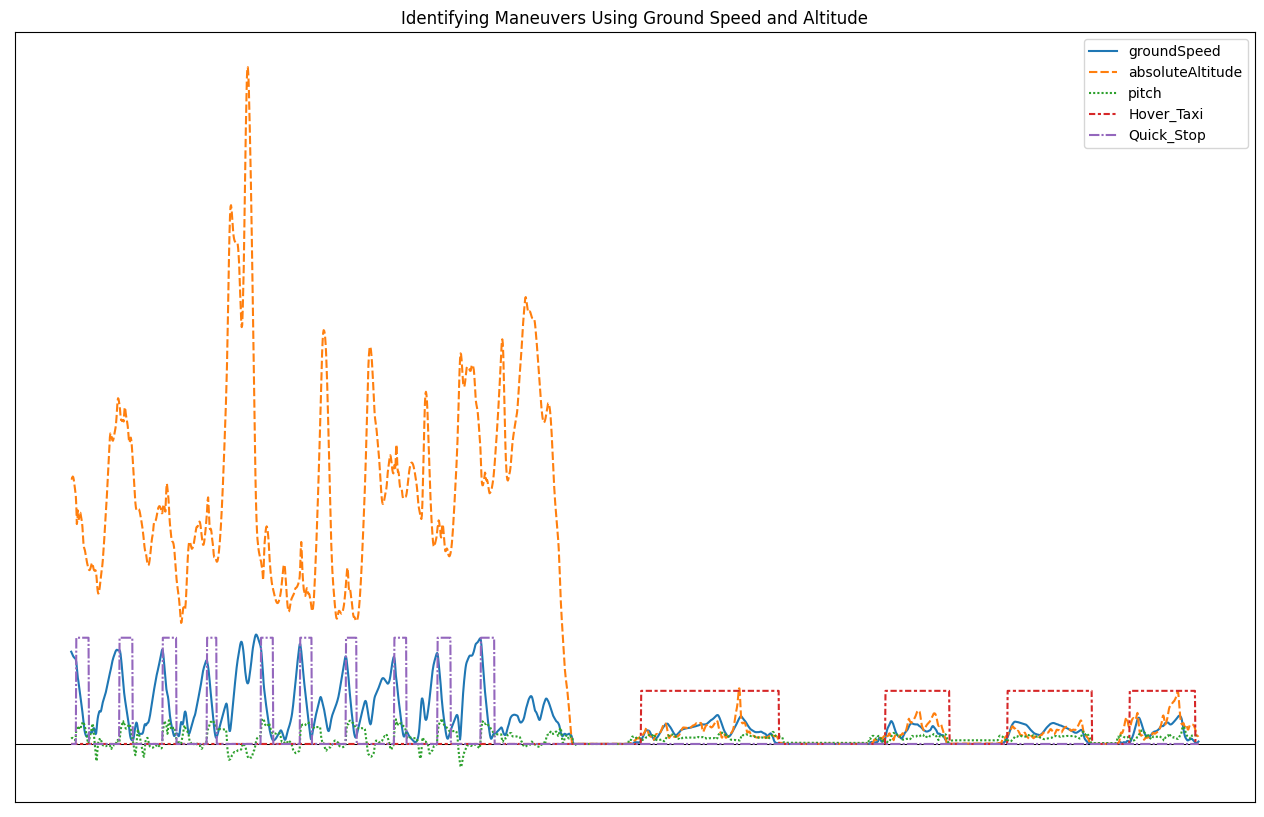

In [59]:
#Plot Ground Speed vs altitude over time - during period with flight logs
df20_groundspd_alt = df20.loc[(df20['datetime'].between('2022-10-20 21:23:20' , '2022-10-20 22:00:15', inclusive='both')),['datetime', 'groundSpeed', 'absoluteAltitude', 'pitch', 'Hover_Taxi', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df20_groundspd_alt).set(title = 'Identifying Maneuvers Using Ground Speed and Altitude')

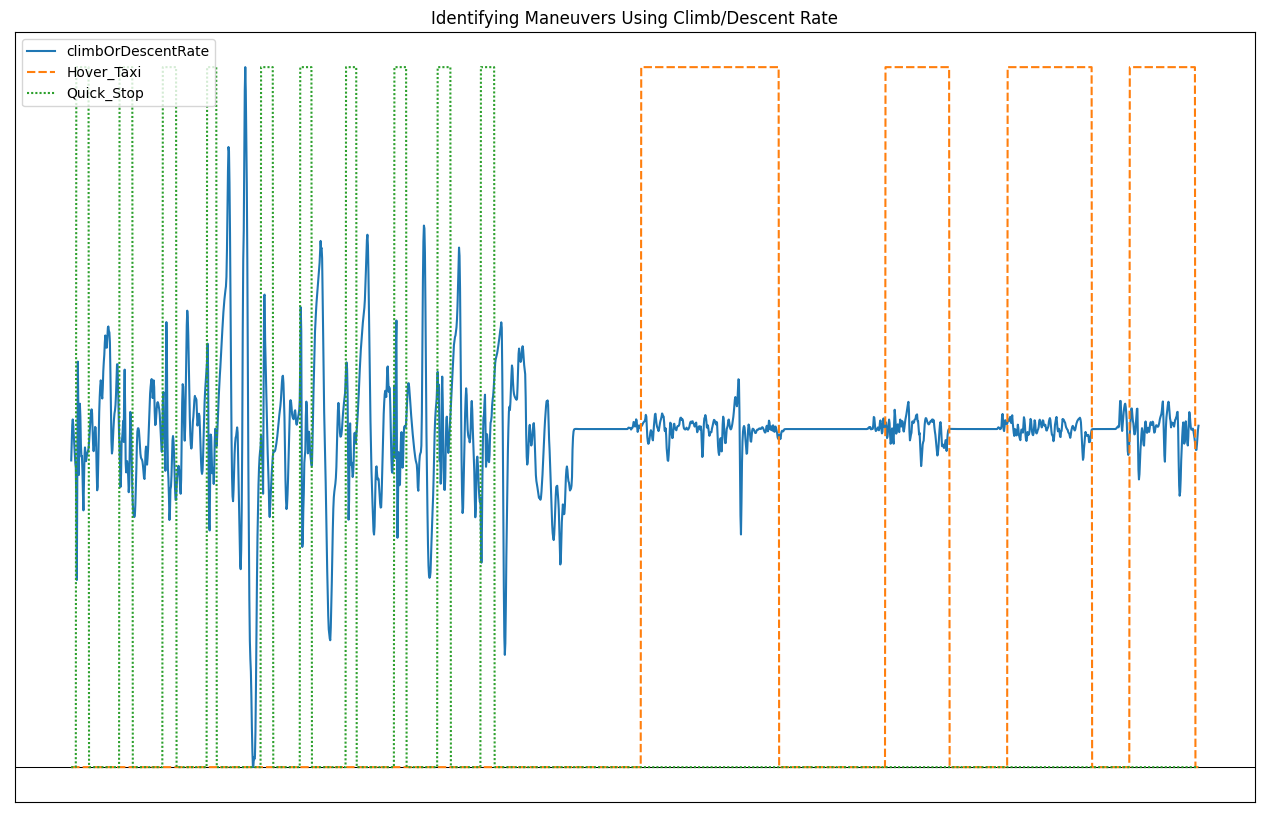

In [60]:
#Plot Ground Speed vs altitude over time
df20_climb_desc = df20_norm.loc[(df20_norm['datetime'].between('2022-10-20 21:23:20' , '2022-10-20 22:00:15' , inclusive='both')),['datetime', 'climbOrDescentRate', 'Hover_Taxi', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df20_climb_desc).set(title = 'Identifying Maneuvers Using Climb/Descent Rate')

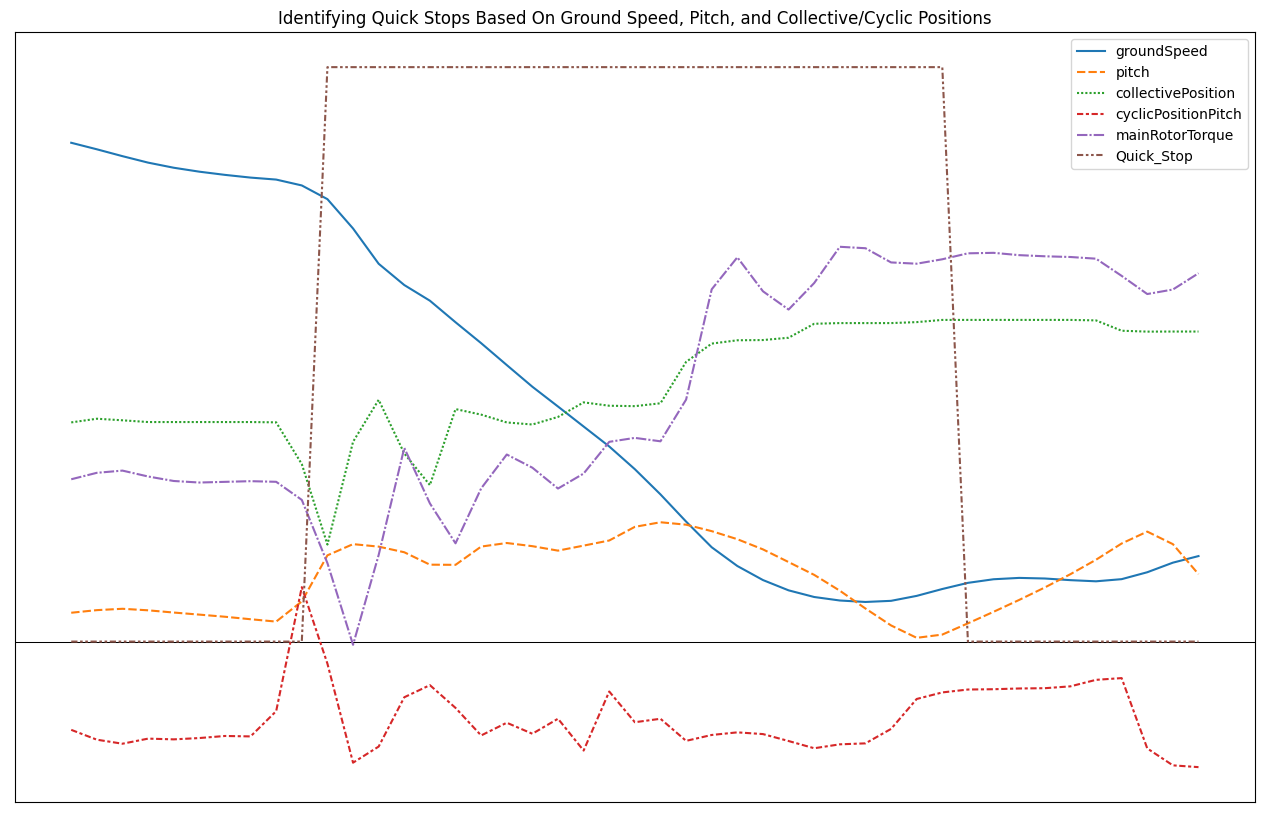

In [61]:
#Plot Quick Stops vs Pitch, Ground Speed, Collective, Cyclic, Torque and Altitude Changes
df20_qs = df20.loc[(df20['datetime'].between('2022-10-20 21:23:20' , '2022-10-20 21:24:04' , inclusive='both')),['datetime', 'groundSpeed', 'pitch', 'collectivePosition', 'cyclicPositionPitch', 'mainRotorTorque', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df20_qs).set(title = 'Identifying Quick Stops Based On Ground Speed, Pitch, and Collective/Cyclic Positions')

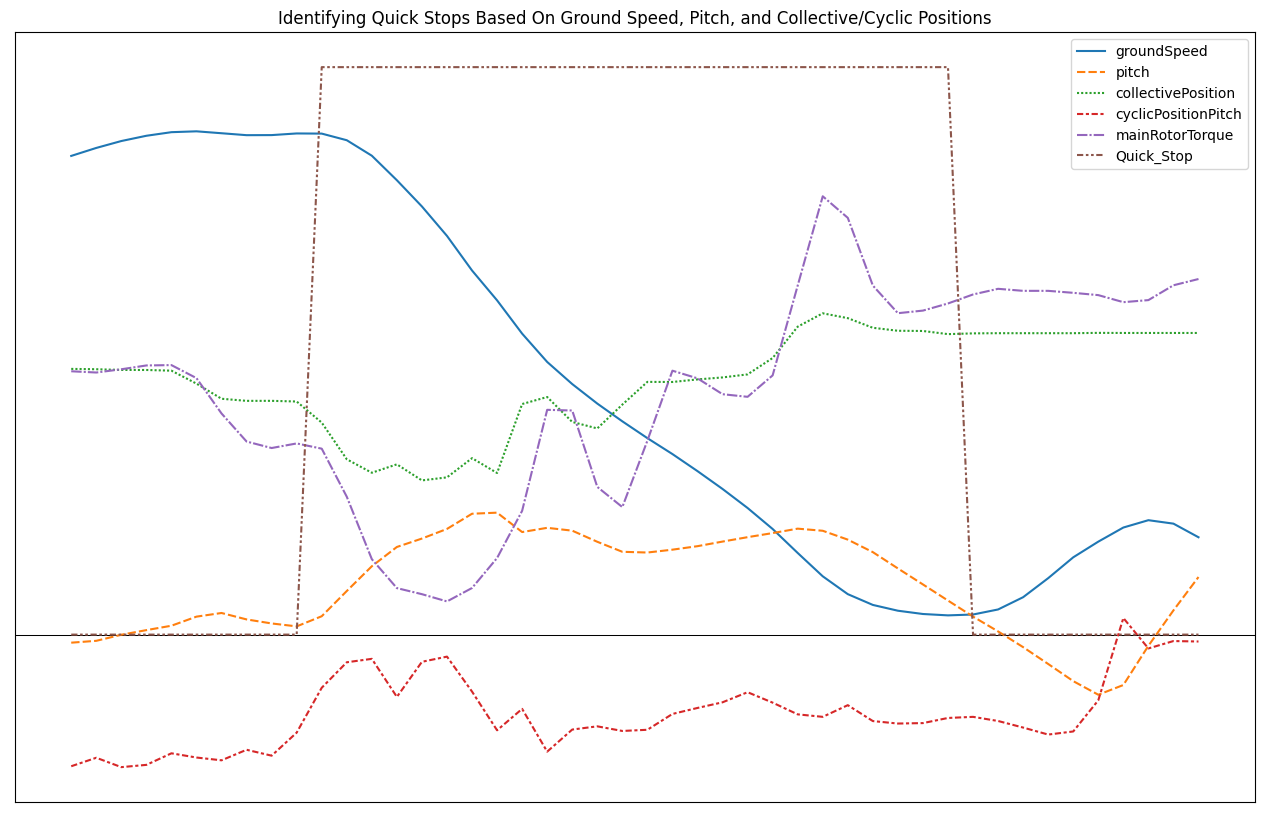

In [62]:
#Plot Quick Stops vs Pitch, Ground Speed, Collective, Cyclic, Torque and Altitude Changes
df20_qs = df20.loc[(df20['datetime'].between('2022-10-20 21:24:45' , '2022-10-20 21:25:30' , inclusive='both')),['datetime', 'groundSpeed', 'pitch', 'collectivePosition', 'cyclicPositionPitch', 'mainRotorTorque', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df20_qs).set(title = 'Identifying Quick Stops Based On Ground Speed, Pitch, and Collective/Cyclic Positions')

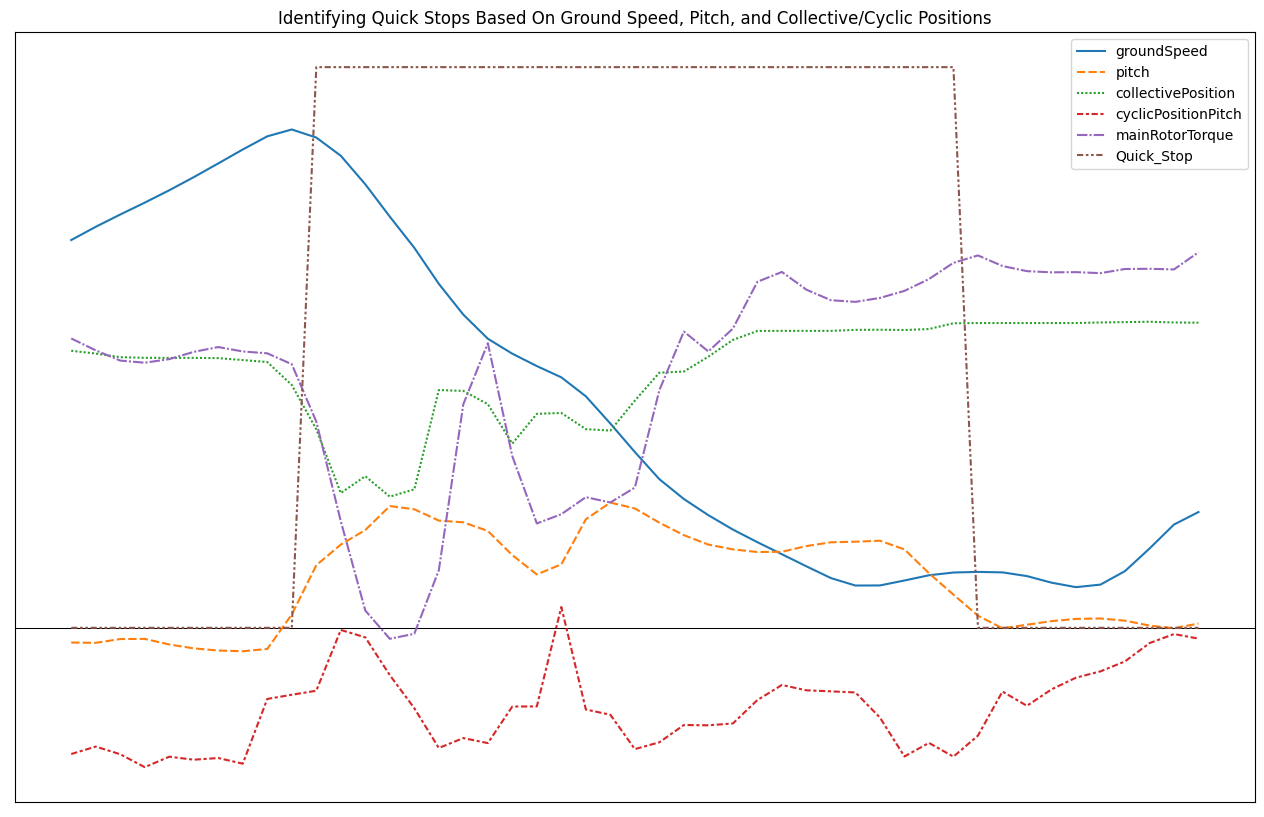

In [63]:
#Plot Quick Stops vs Pitch, Ground Speed, Collective, Cyclic, Torque and Altitude Changes
df20_qs = df20.loc[(df20['datetime'].between('2022-10-20 21:26:10' , '2022-10-20 21:26:56' , inclusive='both')),['datetime', 'groundSpeed', 'pitch', 'collectivePosition', 'cyclicPositionPitch', 'mainRotorTorque', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df20_qs).set(title = 'Identifying Quick Stops Based On Ground Speed, Pitch, and Collective/Cyclic Positions')

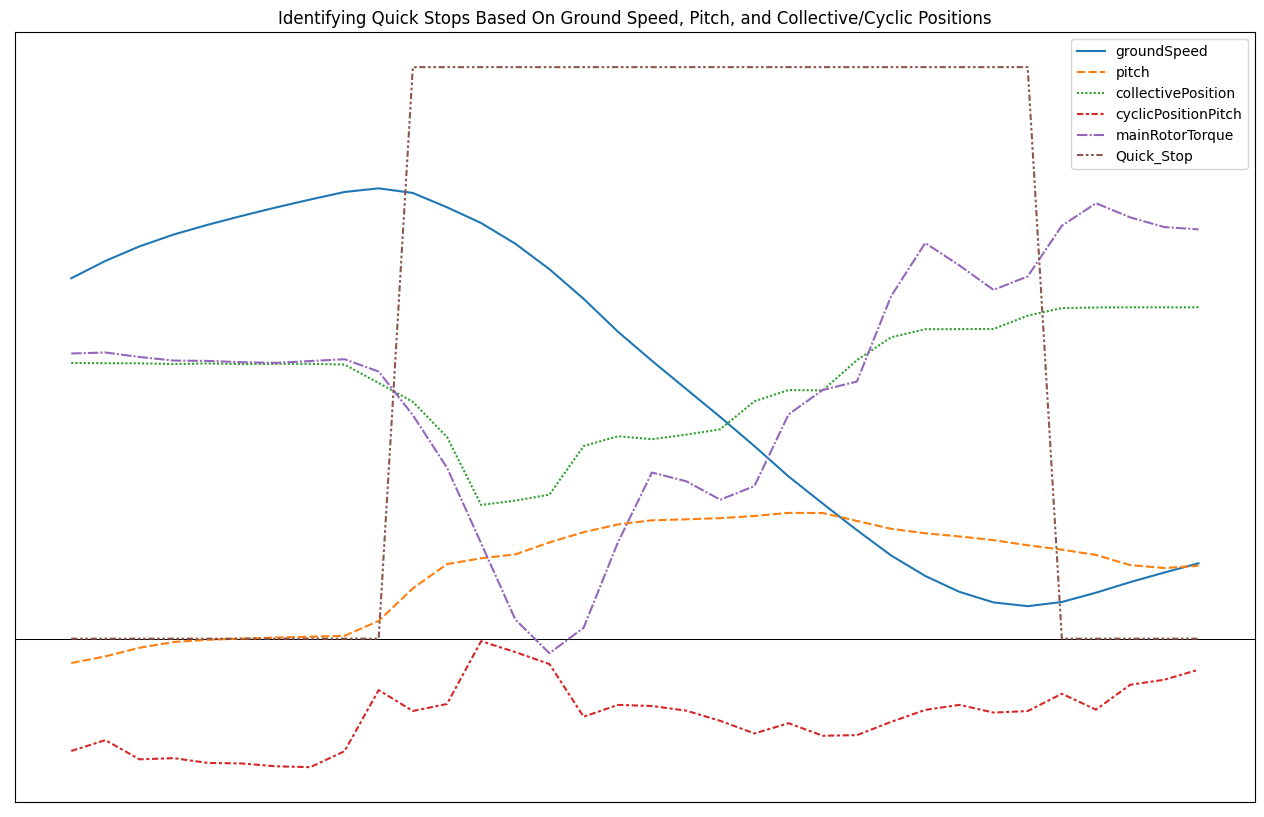

In [64]:
#Plot Quick Stops vs Pitch, Ground Speed, Collective, Cyclic, Torque and Altitude Changes
df20_qs = df20.loc[(df20['datetime'].between('2022-10-20 21:27:37' , '2022-10-20 21:28:10' , inclusive='both')),['datetime', 'groundSpeed', 'pitch', 'collectivePosition', 'cyclicPositionPitch', 'mainRotorTorque', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df20_qs).set(title = 'Identifying Quick Stops Based On Ground Speed, Pitch, and Collective/Cyclic Positions')

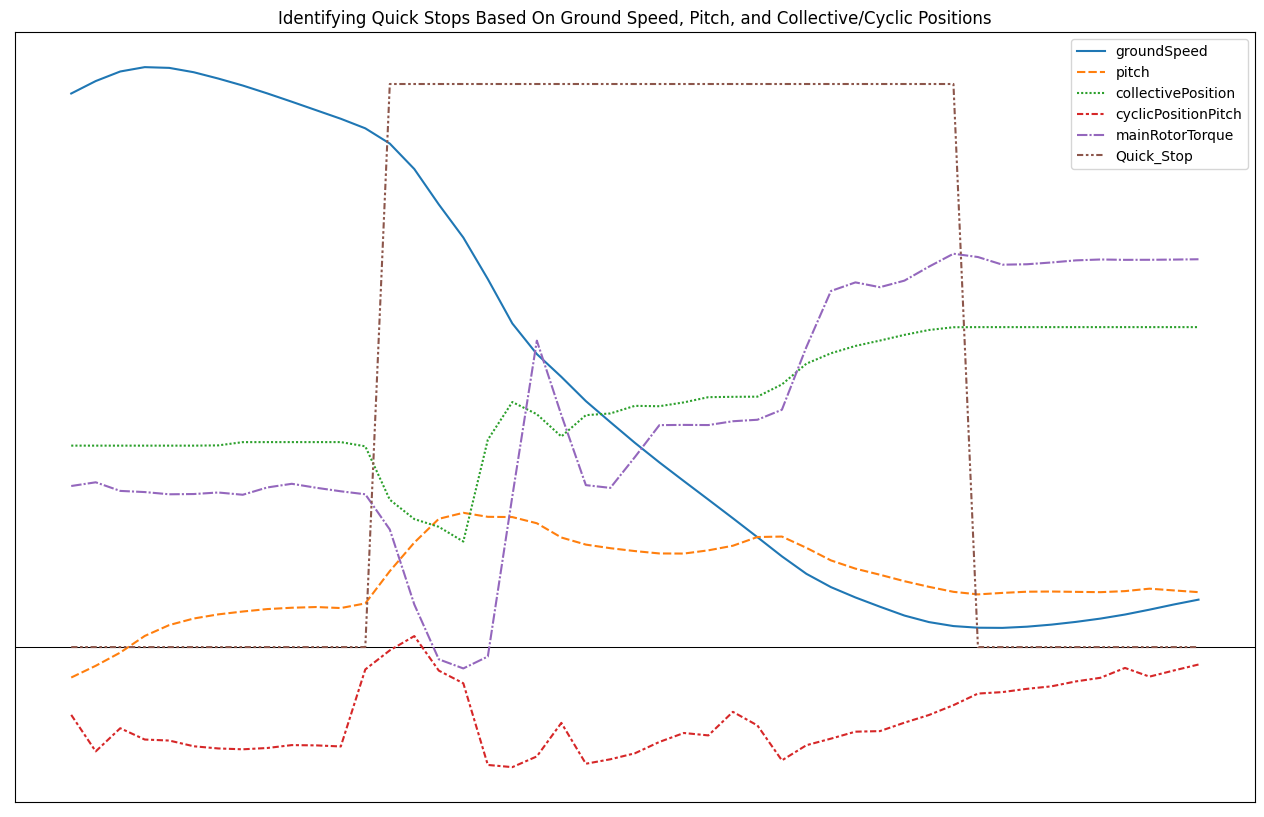

In [65]:
#Plot Quick Stops vs Pitch, Ground Speed, Collective, Cyclic, Torque and Altitude Changes
df20_qs = df20.loc[(df20['datetime'].between('2022-10-20 21:29:20' , '2022-10-20 21:30:06' , inclusive='both')),['datetime', 'groundSpeed', 'pitch', 'collectivePosition', 'cyclicPositionPitch', 'mainRotorTorque', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df20_qs).set(title = 'Identifying Quick Stops Based On Ground Speed, Pitch, and Collective/Cyclic Positions')

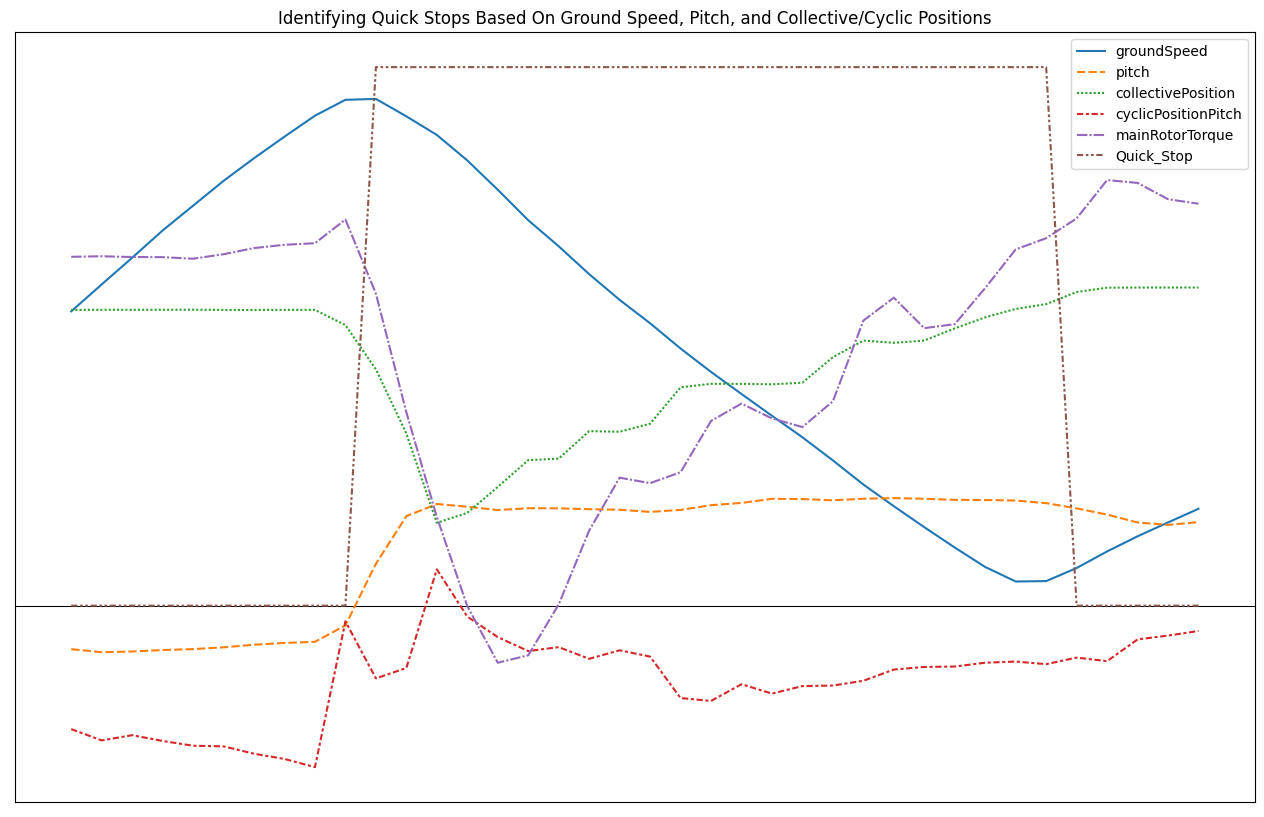

In [66]:
#Plot Quick Stops vs Pitch, Ground Speed, Collective, Cyclic, Torque and Altitude Changes
df20_qs = df20.loc[(df20['datetime'].between('2022-10-20 21:30:40' , '2022-10-20 21:31:17' , inclusive='both')),['datetime', 'groundSpeed', 'pitch', 'collectivePosition', 'cyclicPositionPitch', 'mainRotorTorque', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df20_qs).set(title = 'Identifying Quick Stops Based On Ground Speed, Pitch, and Collective/Cyclic Positions')

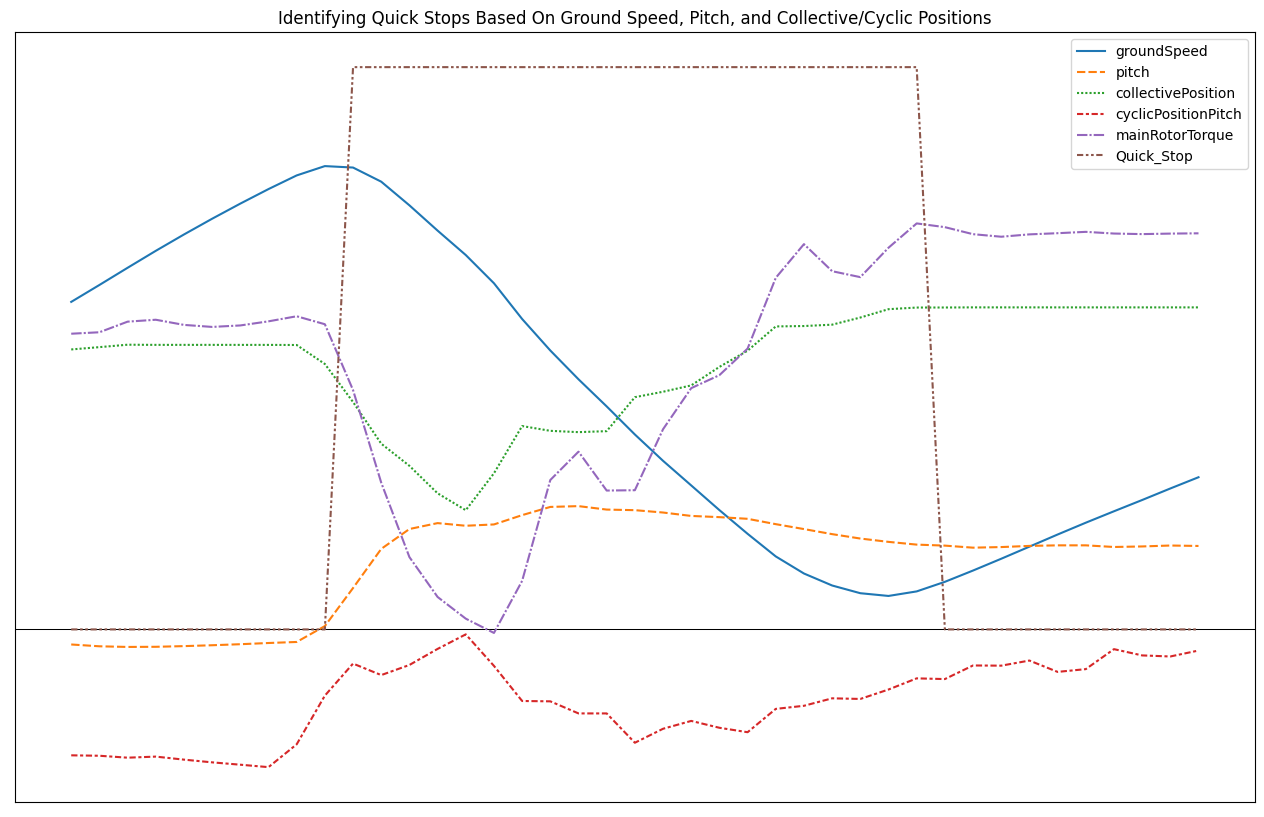

In [67]:
#Plot Quick Stops vs Pitch, Ground Speed, Collective, Cyclic, Torque and Altitude Changes
df20_qs = df20.loc[(df20['datetime'].between('2022-10-20 21:32:10' , '2022-10-20 21:32:50' , inclusive='both')),['datetime', 'groundSpeed', 'pitch', 'collectivePosition', 'cyclicPositionPitch', 'mainRotorTorque', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df20_qs).set(title = 'Identifying Quick Stops Based On Ground Speed, Pitch, and Collective/Cyclic Positions')

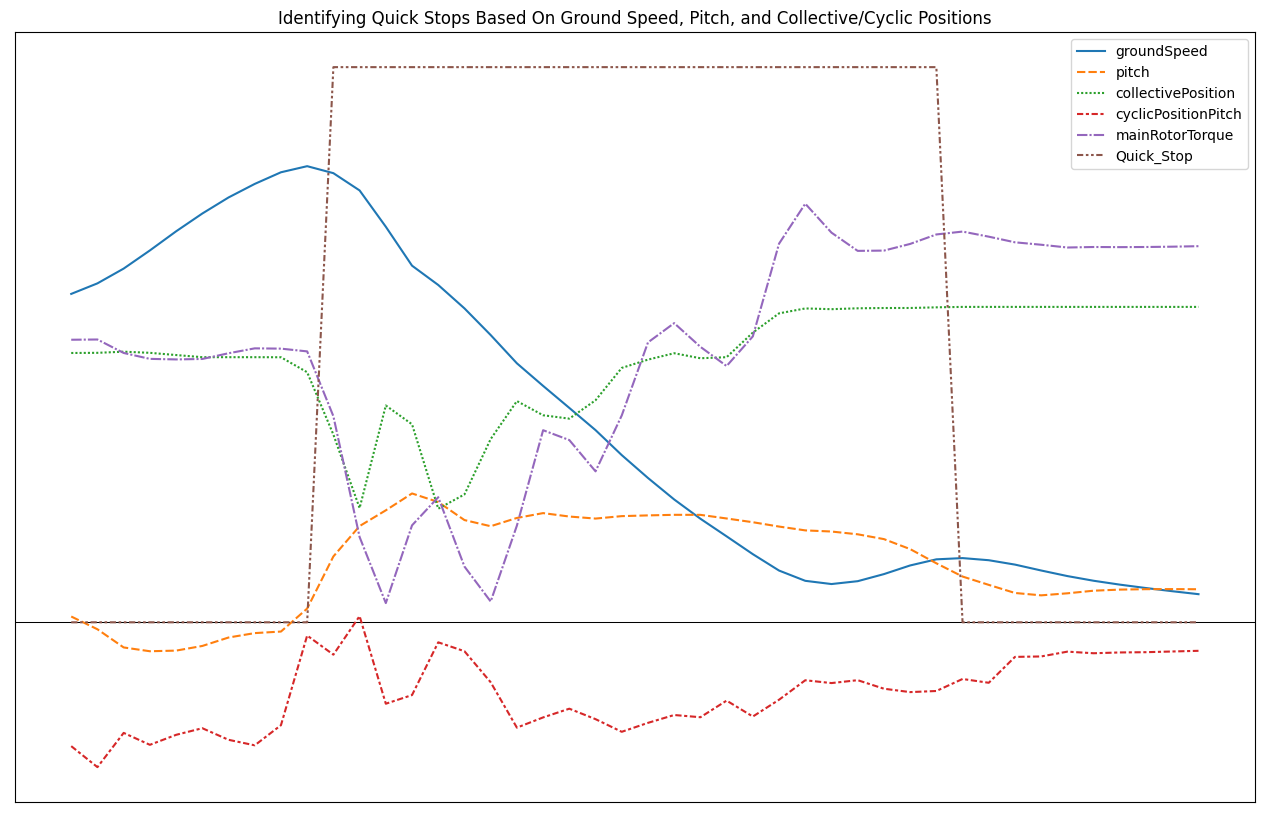

In [68]:
#Plot Quick Stops vs Pitch, Ground Speed, Collective, Cyclic, Torque and Altitude Changes
df20_qs = df20.loc[(df20['datetime'].between('2022-10-20 21:33:45' , '2022-10-20 21:34:28' , inclusive='both')),['datetime', 'groundSpeed', 'pitch', 'collectivePosition', 'cyclicPositionPitch', 'mainRotorTorque', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df20_qs).set(title = 'Identifying Quick Stops Based On Ground Speed, Pitch, and Collective/Cyclic Positions')

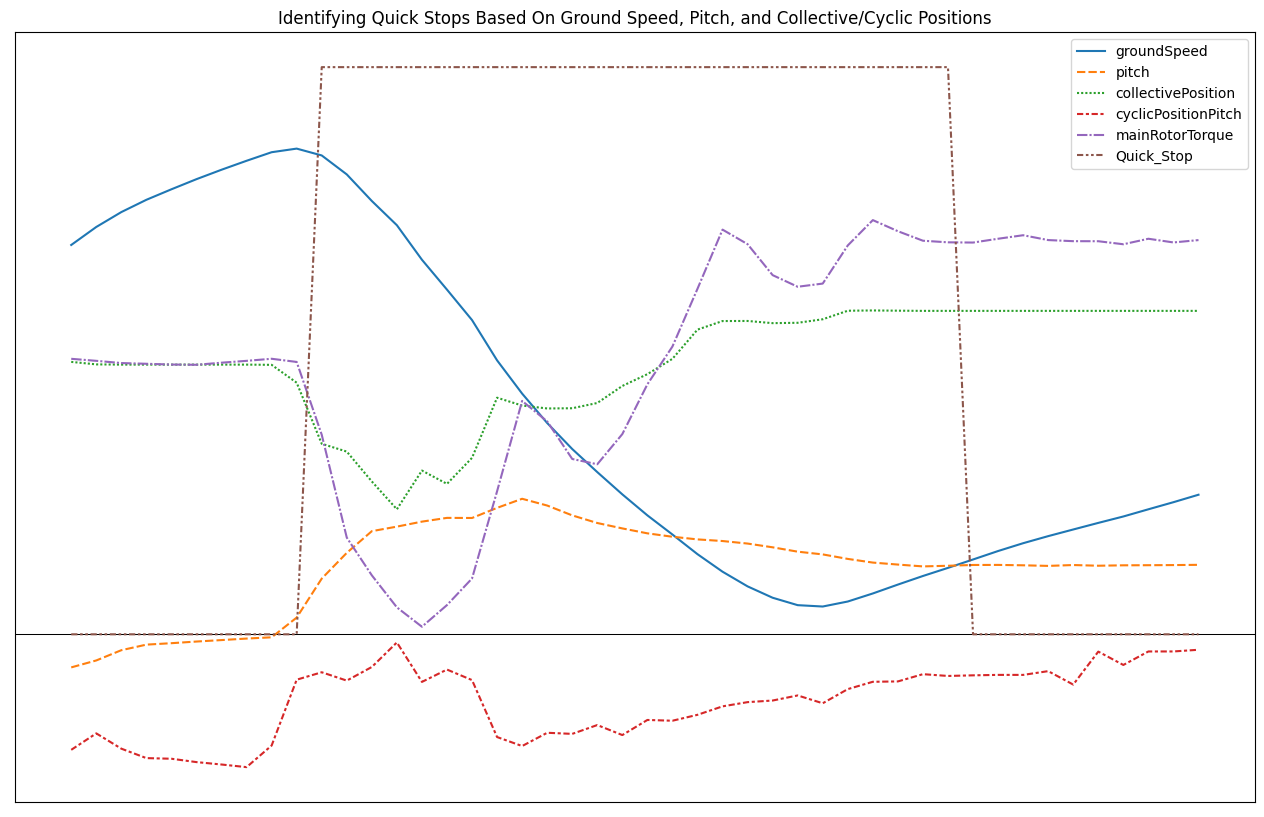

In [69]:
#Plot Quick Stops vs Pitch, Ground Speed, Collective, Cyclic, Torque and Altitude Changes
df20_qs = df20.loc[(df20['datetime'].between('2022-10-20 21:35:10' , '2022-10-20 21:35:55' , inclusive='both')),['datetime', 'groundSpeed', 'pitch', 'collectivePosition', 'cyclicPositionPitch', 'mainRotorTorque', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df20_qs).set(title = 'Identifying Quick Stops Based On Ground Speed, Pitch, and Collective/Cyclic Positions')

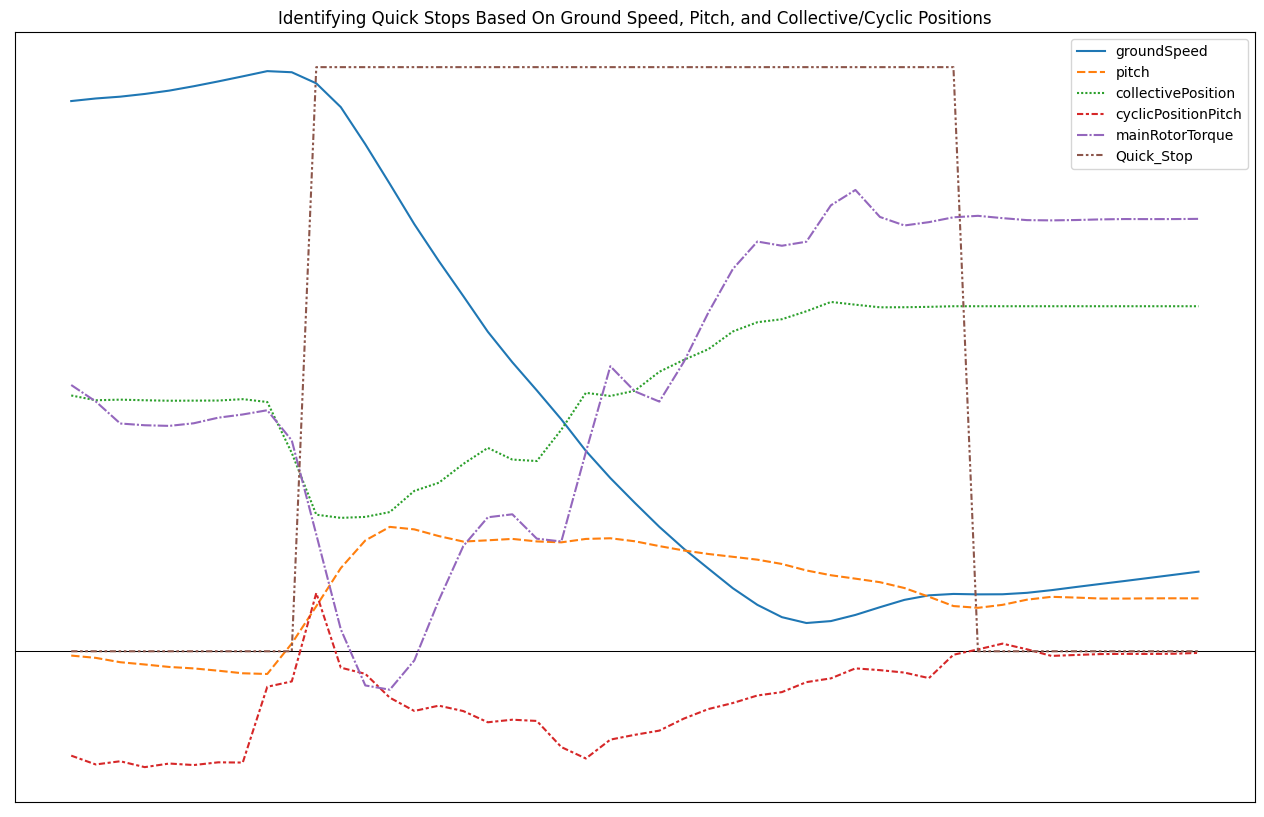

In [70]:
#Plot Quick Stops vs Pitch, Ground Speed, Collective, Cyclic, Torque and Altitude Changes
df20_qs = df20.loc[(df20['datetime'].between('2022-10-20 21:36:35' , '2022-10-20 21:37:21' , inclusive='both')),['datetime', 'groundSpeed', 'pitch', 'collectivePosition', 'cyclicPositionPitch', 'mainRotorTorque', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df20_qs).set(title = 'Identifying Quick Stops Based On Ground Speed, Pitch, and Collective/Cyclic Positions')